## Questions to be solved
1. The SVD in the third question should use the tfidf or simple count matrix?
2. How to determine $\alpha$ and $Z$?
3. 200？

# Group Assignment 2
## By Group 5
This assignment will use the Bank of England Inflation Report data that was used in
the code demonstration. A link to the raw data is here https://www.dropbox.com/s/
ayaecbzexun7q7r/ir_data_final.txt?dl=0.
Your assignment is the following:

## Question 1
Repeat the LSA analysis from the demonstration notebook, but use an entire Report
as a document rather than a paragraph. How do the word similarity tasks change?
How else do the two models compare? Explain why you believe the two different
definitions of document granularity do—or do not—produce different results.


In [1]:
# Load the document
import csv
import pandas as pd
file = 'src/ir_data_final.txt'
text_list=[]
with open(file, newline = '\n',encoding='utf-8') as ID:                                                                                          
    texts = csv.reader(ID, delimiter='\t')
    for text in texts:
        text_list.append(text)

print(text_list[1])

['199802', 'It is almost six years since output reached its trough in the last recession. Since then, output has risen at an average rate of 3% a year and inflation has fallen from almost 5% to below 3% a year. The combination of above-trend growth and falling inflation is unsustainable, and has probably already come to an end. At this juncture, with output growth likely to fall sharply, monetary policy is more finely balanced than at any point since the inflation target was introduced in 1992. The central issue is whether the existing policy stance will slow the economy sufficiently quickly to prevent further upward pressure on earnings growth and retail price inflation.', '0.0', '', '', '', '']


In [2]:
name0=text_list[0][0]
name1=text_list[0][1]
name2=text_list[0][2]
name3=text_list[0][3]
name4=text_list[0][4]
name5=text_list[0][5]
name6=text_list[0][6]

date=[]
paragraph=[]
section1=[]
section2=[]
section3=[]
section4=[]
section5=[]

for text in text_list:
    #print(text_list.index(text))
    if text_list.index(text)!=0:
        date.append(text[0])
        paragraph.append(text[1])
        section1.append(text[2])
        section2.append(text[3])
        section3.append(text[4])
        section4.append(text[5])
        section5.append(text[6])

We then load the data and transform it into document level.

In [3]:
data_paragraph=pd.DataFrame({'Date':date,'Paragraph':paragraph,'Section1':section1,'Section2':section2,'Section3':section3,\
                   'section4':section4,'section5':section5})

#Data with main texts and week identifier
dt_list=list(set(date))
idx_list=[[idx for idx,xx in enumerate(date) if xx==dt]for dt in dt_list]
#generate the main documents of the inflation report
text_new=[' '.join([paragraph[num] for num in idx]) for idx in idx_list]
#prepare the data at the article level
data_article=pd.DataFrame({'Date': dt_list,'Report': text_new})
data_article=data_article.sort_values(by='Date')
print(data_article.iloc[:10,])

      Date                                             Report
20  199802  It is almost six years since output reached it...
14  199805  Inflation, as measured by RPIX, is projected t...
40  199808  This Inflation Report is the first since the B...
2   199811  The Monetary Policy Committee sets interest ra...
7   199902  Inflation on the RPIX measure was close to the...
15  199905  Prospects for the world economy, which deterio...
38  199908  Growth in the UK economy has resumed in recent...
44  199911  Economic growth in the United Kingdom has pick...
4   200002  Growth with low inflation has continued in the...
66  200005  In the first quarter of 2000, output in the UK...


In [4]:
# Import nltk packages and tools we need 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
import re
from nltk.corpus import stopwords
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [ ]:
# a naive and incomplete demonstration on how to read a *.spydata file
import pickle
import tarfile
# open a .spydata file
filename = path+'Data_Imported.spydata'
tar = tarfile.open(filename, "r")
# extract all pickled files to the current working directory
tar.extractall()
extracted_files = tar.getnames()
for f in extracted_files:
    if f.endswith('.pickle'):
         with open(f, 'rb') as fdesc:
             data = pickle.loads(fdesc.read())
new_text=data['new_text']
new_text1=data['new_text1']
new_text2=data['new_text2']

#Here we only slice parts of the data
new_text1=new_text1[:500]

In [5]:
# The preprocess function
def mypreprocess(text):
    #text is a document of a corpus
    #lowercase of text
    text=text.lower()
    # remove all the irrelevant numbers and punctuation
    # text=re.sub(r'[^a-z]+',' ',text)
    # tokenize the words
    token1=word_tokenize(text)
    #remove the meaningless stopping words
    token2=[t for t in token1 if t not in stopwords.words('english')]
    #stemming transformation
    Porter=1
    if Porter==1:
        token3=[porter.stem(t) for t in token2]
    else:
        token3=[lancaster.stem(t) for t in token2]
    return token3

In [6]:
#output in preprocessed word lists of corpus
Token1=[]
#output in preprocessed document of corpus
new_text1=[]

for report in data_article['Report'].tolist():
    token3=mypreprocess(report)
    #Construct the list of words in the corporus
    Token1.append(token3)
    #for the document after cleaning the stopping words in each document of the corpurs
    new_text1.append(' '.join(token3))
    # print('Num of Loop at '+str(data_paragraph['Paragraph'].tolist().index(paragraph)))

len(new_text1)

70

In [7]:
Token1

[['almost',
  'six',
  'year',
  'sinc',
  'output',
  'reach',
  'trough',
  'last',
  'recess',
  '.',
  'sinc',
  ',',
  'output',
  'risen',
  'averag',
  'rate',
  '3',
  '%',
  'year',
  'inflat',
  'fallen',
  'almost',
  '5',
  '%',
  '3',
  '%',
  'year',
  '.',
  'combin',
  'above-trend',
  'growth',
  'fall',
  'inflat',
  'unsustain',
  ',',
  'probabl',
  'alreadi',
  'come',
  'end',
  '.',
  'junctur',
  ',',
  'output',
  'growth',
  'like',
  'fall',
  'sharpli',
  ',',
  'monetari',
  'polici',
  'fine',
  'balanc',
  'point',
  'sinc',
  'inflat',
  'target',
  'introduc',
  '1992.',
  'central',
  'issu',
  'whether',
  'exist',
  'polici',
  'stanc',
  'slow',
  'economi',
  'suffici',
  'quickli',
  'prevent',
  'upward',
  'pressur',
  'earn',
  'growth',
  'retail',
  'price',
  'inflat',
  '.',
  'monetari',
  'polici',
  'current',
  'pull',
  'opposit',
  'direct',
  '.',
  'one',
  'hand',
  ',',
  'despit',
  'one-off',
  'effect',
  'higher',
  'level',
 

In [7]:
#generate the training at the sentence level and prepare the corpus
Token2=[]
new_text2=[]
for paragraph in data_paragraph['Paragraph'].tolist():
    print('Num of Loop at '+str(data_paragraph['Paragraph'].tolist().index(paragraph)))
    sentences=sent_tokenize(paragraph)
    for sent in sentences:
        #save the preprocessed document at the sentence level in lists
        Token2.append(mypreprocess(sent))
        #save the preprocessed document at the sentence level in strings
        new_text2.append(' '.join(mypreprocess(sent)))

Num of Loop at 0
Num of Loop at 1
Num of Loop at 2
Num of Loop at 3
Num of Loop at 4
Num of Loop at 5
Num of Loop at 6
Num of Loop at 7
Num of Loop at 8
Num of Loop at 9
Num of Loop at 10
Num of Loop at 11
Num of Loop at 12
Num of Loop at 13
Num of Loop at 14
Num of Loop at 15
Num of Loop at 16
Num of Loop at 17
Num of Loop at 18
Num of Loop at 19
Num of Loop at 20
Num of Loop at 21
Num of Loop at 22
Num of Loop at 23
Num of Loop at 24
Num of Loop at 25
Num of Loop at 26
Num of Loop at 27
Num of Loop at 28
Num of Loop at 29
Num of Loop at 30
Num of Loop at 31
Num of Loop at 32
Num of Loop at 33
Num of Loop at 34
Num of Loop at 35
Num of Loop at 36
Num of Loop at 37
Num of Loop at 38
Num of Loop at 39
Num of Loop at 40
Num of Loop at 41
Num of Loop at 42
Num of Loop at 43
Num of Loop at 44
Num of Loop at 45
Num of Loop at 46
Num of Loop at 47
Num of Loop at 48
Num of Loop at 49
Num of Loop at 50
Num of Loop at 51
Num of Loop at 52
Num of Loop at 53
Num of Loop at 54
Num of Loop at 55
Nu

Num of Loop at 439
Num of Loop at 440
Num of Loop at 441
Num of Loop at 442
Num of Loop at 443
Num of Loop at 444
Num of Loop at 445
Num of Loop at 446
Num of Loop at 447
Num of Loop at 448
Num of Loop at 449
Num of Loop at 450
Num of Loop at 451
Num of Loop at 452
Num of Loop at 453
Num of Loop at 454
Num of Loop at 455
Num of Loop at 456
Num of Loop at 457
Num of Loop at 458
Num of Loop at 459
Num of Loop at 460
Num of Loop at 461
Num of Loop at 462
Num of Loop at 463
Num of Loop at 464
Num of Loop at 465
Num of Loop at 466
Num of Loop at 467
Num of Loop at 468
Num of Loop at 469
Num of Loop at 470
Num of Loop at 471
Num of Loop at 472
Num of Loop at 473
Num of Loop at 474
Num of Loop at 475
Num of Loop at 476
Num of Loop at 477
Num of Loop at 478
Num of Loop at 479
Num of Loop at 480
Num of Loop at 481
Num of Loop at 482
Num of Loop at 483
Num of Loop at 484
Num of Loop at 485
Num of Loop at 486
Num of Loop at 487
Num of Loop at 488
Num of Loop at 489
Num of Loop at 490
Num of Loop 

Num of Loop at 872
Num of Loop at 873
Num of Loop at 874
Num of Loop at 875
Num of Loop at 876
Num of Loop at 877
Num of Loop at 878
Num of Loop at 879
Num of Loop at 880
Num of Loop at 881
Num of Loop at 882
Num of Loop at 883
Num of Loop at 884
Num of Loop at 885
Num of Loop at 886
Num of Loop at 887
Num of Loop at 888
Num of Loop at 889
Num of Loop at 890
Num of Loop at 891
Num of Loop at 892
Num of Loop at 893
Num of Loop at 894
Num of Loop at 895
Num of Loop at 896
Num of Loop at 897
Num of Loop at 898
Num of Loop at 532
Num of Loop at 900
Num of Loop at 901
Num of Loop at 902
Num of Loop at 903
Num of Loop at 904
Num of Loop at 905
Num of Loop at 906
Num of Loop at 907
Num of Loop at 908
Num of Loop at 909
Num of Loop at 910
Num of Loop at 911
Num of Loop at 912
Num of Loop at 913
Num of Loop at 914
Num of Loop at 915
Num of Loop at 916
Num of Loop at 917
Num of Loop at 918
Num of Loop at 919
Num of Loop at 920
Num of Loop at 921
Num of Loop at 922
Num of Loop at 923
Num of Loop 

Num of Loop at 1291
Num of Loop at 1292
Num of Loop at 1293
Num of Loop at 1294
Num of Loop at 1295
Num of Loop at 1296
Num of Loop at 1297
Num of Loop at 1298
Num of Loop at 1299
Num of Loop at 1300
Num of Loop at 1301
Num of Loop at 1302
Num of Loop at 1303
Num of Loop at 1304
Num of Loop at 1305
Num of Loop at 1306
Num of Loop at 1307
Num of Loop at 1308
Num of Loop at 1309
Num of Loop at 1310
Num of Loop at 1311
Num of Loop at 1312
Num of Loop at 1313
Num of Loop at 1314
Num of Loop at 1315
Num of Loop at 1316
Num of Loop at 1317
Num of Loop at 1318
Num of Loop at 1319
Num of Loop at 1320
Num of Loop at 1321
Num of Loop at 1322
Num of Loop at 1323
Num of Loop at 1324
Num of Loop at 1325
Num of Loop at 1326
Num of Loop at 1327
Num of Loop at 1328
Num of Loop at 1329
Num of Loop at 1330
Num of Loop at 1331
Num of Loop at 1332
Num of Loop at 1333
Num of Loop at 1334
Num of Loop at 1335
Num of Loop at 1336
Num of Loop at 1337
Num of Loop at 1338
Num of Loop at 1339
Num of Loop at 1340


Num of Loop at 1701
Num of Loop at 1702
Num of Loop at 1703
Num of Loop at 1704
Num of Loop at 1705
Num of Loop at 1706
Num of Loop at 1707
Num of Loop at 1708
Num of Loop at 1709
Num of Loop at 1710
Num of Loop at 1711
Num of Loop at 1712
Num of Loop at 1713
Num of Loop at 1714
Num of Loop at 1715
Num of Loop at 1716
Num of Loop at 1717
Num of Loop at 1718
Num of Loop at 1719
Num of Loop at 1720
Num of Loop at 1721
Num of Loop at 1722
Num of Loop at 1723
Num of Loop at 1724
Num of Loop at 1724
Num of Loop at 1726
Num of Loop at 1727
Num of Loop at 1728
Num of Loop at 1729
Num of Loop at 1730
Num of Loop at 1731
Num of Loop at 1732
Num of Loop at 1733
Num of Loop at 1734
Num of Loop at 1735
Num of Loop at 1736
Num of Loop at 1737
Num of Loop at 1738
Num of Loop at 1739
Num of Loop at 1740
Num of Loop at 1741
Num of Loop at 1742
Num of Loop at 1743
Num of Loop at 1744
Num of Loop at 1745
Num of Loop at 1746
Num of Loop at 1747
Num of Loop at 1748
Num of Loop at 1749
Num of Loop at 1750


Num of Loop at 2114
Num of Loop at 2115
Num of Loop at 2116
Num of Loop at 2117
Num of Loop at 2118
Num of Loop at 2119
Num of Loop at 2120
Num of Loop at 2121
Num of Loop at 2122
Num of Loop at 2123
Num of Loop at 2124
Num of Loop at 2125
Num of Loop at 2126
Num of Loop at 2127
Num of Loop at 2128
Num of Loop at 2129
Num of Loop at 2130
Num of Loop at 2131
Num of Loop at 2132
Num of Loop at 2133
Num of Loop at 2134
Num of Loop at 2135
Num of Loop at 2136
Num of Loop at 2137
Num of Loop at 2138
Num of Loop at 2139
Num of Loop at 2140
Num of Loop at 2141
Num of Loop at 2142
Num of Loop at 2143
Num of Loop at 2144
Num of Loop at 2145
Num of Loop at 2146
Num of Loop at 2147
Num of Loop at 2148
Num of Loop at 2149
Num of Loop at 2150
Num of Loop at 2151
Num of Loop at 2152
Num of Loop at 2153
Num of Loop at 2154
Num of Loop at 2155
Num of Loop at 2156
Num of Loop at 2157
Num of Loop at 2158
Num of Loop at 2159
Num of Loop at 2160
Num of Loop at 2161
Num of Loop at 2162
Num of Loop at 2163


Num of Loop at 2524
Num of Loop at 2525
Num of Loop at 2526
Num of Loop at 2527
Num of Loop at 2528
Num of Loop at 2529
Num of Loop at 2530
Num of Loop at 2531
Num of Loop at 2532
Num of Loop at 2533
Num of Loop at 2534
Num of Loop at 2535
Num of Loop at 2536
Num of Loop at 2537
Num of Loop at 2538
Num of Loop at 2539
Num of Loop at 2540
Num of Loop at 2541
Num of Loop at 2542
Num of Loop at 2543
Num of Loop at 2544
Num of Loop at 2545
Num of Loop at 2546
Num of Loop at 2547
Num of Loop at 2548
Num of Loop at 2549
Num of Loop at 2550
Num of Loop at 2551
Num of Loop at 2552
Num of Loop at 2553
Num of Loop at 2554
Num of Loop at 2555
Num of Loop at 2556
Num of Loop at 2557
Num of Loop at 2558
Num of Loop at 2559
Num of Loop at 2560
Num of Loop at 2561
Num of Loop at 2562
Num of Loop at 2563
Num of Loop at 2564
Num of Loop at 2565
Num of Loop at 2566
Num of Loop at 2567
Num of Loop at 2568
Num of Loop at 1262
Num of Loop at 2570
Num of Loop at 2571
Num of Loop at 2572
Num of Loop at 2573


Num of Loop at 2935
Num of Loop at 2936
Num of Loop at 2932
Num of Loop at 2938
Num of Loop at 2939
Num of Loop at 2940
Num of Loop at 2941
Num of Loop at 2942
Num of Loop at 2943
Num of Loop at 2944
Num of Loop at 2945
Num of Loop at 2946
Num of Loop at 2947
Num of Loop at 2948
Num of Loop at 2949
Num of Loop at 2950
Num of Loop at 2951
Num of Loop at 2952
Num of Loop at 2953
Num of Loop at 2954
Num of Loop at 2955
Num of Loop at 2956
Num of Loop at 2957
Num of Loop at 2958
Num of Loop at 2959
Num of Loop at 2960
Num of Loop at 2961
Num of Loop at 2962
Num of Loop at 2963
Num of Loop at 2964
Num of Loop at 2965
Num of Loop at 2966
Num of Loop at 2967
Num of Loop at 2968
Num of Loop at 2969
Num of Loop at 2970
Num of Loop at 2971
Num of Loop at 2972
Num of Loop at 2973
Num of Loop at 2974
Num of Loop at 2975
Num of Loop at 2976
Num of Loop at 2977
Num of Loop at 2978
Num of Loop at 2979
Num of Loop at 2980
Num of Loop at 2981
Num of Loop at 2982
Num of Loop at 2983
Num of Loop at 2984


Num of Loop at 3347
Num of Loop at 3348
Num of Loop at 3349
Num of Loop at 3350
Num of Loop at 3351
Num of Loop at 3352
Num of Loop at 3353
Num of Loop at 3354
Num of Loop at 3355
Num of Loop at 3356
Num of Loop at 3357
Num of Loop at 3358
Num of Loop at 3359
Num of Loop at 3360
Num of Loop at 3361
Num of Loop at 3362
Num of Loop at 3363
Num of Loop at 3364
Num of Loop at 3365
Num of Loop at 3366
Num of Loop at 3367
Num of Loop at 3368
Num of Loop at 3369
Num of Loop at 3370
Num of Loop at 3371
Num of Loop at 3372
Num of Loop at 3373
Num of Loop at 3374
Num of Loop at 3375
Num of Loop at 3376
Num of Loop at 3377
Num of Loop at 3378
Num of Loop at 3379
Num of Loop at 3380
Num of Loop at 3381
Num of Loop at 3382
Num of Loop at 3383
Num of Loop at 3384
Num of Loop at 3385
Num of Loop at 3386
Num of Loop at 3387
Num of Loop at 3388
Num of Loop at 3389
Num of Loop at 3390
Num of Loop at 3391
Num of Loop at 3392
Num of Loop at 3393
Num of Loop at 3394
Num of Loop at 3395
Num of Loop at 3396


Num of Loop at 3757
Num of Loop at 3758
Num of Loop at 3759
Num of Loop at 3760
Num of Loop at 3761
Num of Loop at 3762
Num of Loop at 3763
Num of Loop at 3764
Num of Loop at 3765
Num of Loop at 3766
Num of Loop at 3767
Num of Loop at 3768
Num of Loop at 3769
Num of Loop at 3770
Num of Loop at 3771
Num of Loop at 3772
Num of Loop at 3773
Num of Loop at 3774
Num of Loop at 3775
Num of Loop at 3776
Num of Loop at 3777
Num of Loop at 3778
Num of Loop at 3779
Num of Loop at 3780
Num of Loop at 3781
Num of Loop at 3782
Num of Loop at 3783
Num of Loop at 3784
Num of Loop at 3785
Num of Loop at 3786
Num of Loop at 3787
Num of Loop at 3788
Num of Loop at 3789
Num of Loop at 3790
Num of Loop at 3791
Num of Loop at 3792
Num of Loop at 3793
Num of Loop at 3794
Num of Loop at 3795
Num of Loop at 3796
Num of Loop at 3797
Num of Loop at 3798
Num of Loop at 3799
Num of Loop at 3800
Num of Loop at 3801
Num of Loop at 3802
Num of Loop at 3803
Num of Loop at 3804
Num of Loop at 3805
Num of Loop at 3806


Num of Loop at 4170
Num of Loop at 4171
Num of Loop at 4172
Num of Loop at 4173
Num of Loop at 4174
Num of Loop at 4175
Num of Loop at 4176
Num of Loop at 4177
Num of Loop at 4178
Num of Loop at 4179
Num of Loop at 4180
Num of Loop at 4181
Num of Loop at 4182
Num of Loop at 4183
Num of Loop at 4184
Num of Loop at 4185
Num of Loop at 4186
Num of Loop at 4187
Num of Loop at 4188
Num of Loop at 4189
Num of Loop at 4190
Num of Loop at 4191
Num of Loop at 4192
Num of Loop at 4193
Num of Loop at 4194
Num of Loop at 4195
Num of Loop at 4196
Num of Loop at 4197
Num of Loop at 4198
Num of Loop at 4199
Num of Loop at 4200
Num of Loop at 4201
Num of Loop at 4202
Num of Loop at 4203
Num of Loop at 4204
Num of Loop at 4205
Num of Loop at 4206
Num of Loop at 4207
Num of Loop at 4208
Num of Loop at 4209
Num of Loop at 4210
Num of Loop at 4211
Num of Loop at 4212
Num of Loop at 4213
Num of Loop at 4214
Num of Loop at 4215
Num of Loop at 4216
Num of Loop at 4217
Num of Loop at 4218
Num of Loop at 4219


Num of Loop at 4580
Num of Loop at 4581
Num of Loop at 4582
Num of Loop at 4583
Num of Loop at 4584
Num of Loop at 4585
Num of Loop at 4586
Num of Loop at 4587
Num of Loop at 4588
Num of Loop at 4589
Num of Loop at 4590
Num of Loop at 4591
Num of Loop at 4592
Num of Loop at 4593
Num of Loop at 4594
Num of Loop at 4595
Num of Loop at 4596
Num of Loop at 4597
Num of Loop at 4598
Num of Loop at 4599
Num of Loop at 4600
Num of Loop at 4601
Num of Loop at 4602
Num of Loop at 4603
Num of Loop at 4604
Num of Loop at 4605
Num of Loop at 4606
Num of Loop at 4607
Num of Loop at 4608
Num of Loop at 4609
Num of Loop at 4610
Num of Loop at 4611
Num of Loop at 4612
Num of Loop at 4613
Num of Loop at 4614
Num of Loop at 4615
Num of Loop at 4616
Num of Loop at 4617
Num of Loop at 4618
Num of Loop at 4619
Num of Loop at 4620
Num of Loop at 4621
Num of Loop at 4622
Num of Loop at 4623
Num of Loop at 4624
Num of Loop at 4625
Num of Loop at 4626
Num of Loop at 4627
Num of Loop at 4628
Num of Loop at 4629


Num of Loop at 4990
Num of Loop at 4991
Num of Loop at 4992
Num of Loop at 4993
Num of Loop at 4994
Num of Loop at 4995
Num of Loop at 4996
Num of Loop at 4997
Num of Loop at 4998
Num of Loop at 4999
Num of Loop at 5000
Num of Loop at 5001
Num of Loop at 5002
Num of Loop at 5003
Num of Loop at 5004
Num of Loop at 5005
Num of Loop at 5006
Num of Loop at 5007
Num of Loop at 5008
Num of Loop at 5009
Num of Loop at 5010
Num of Loop at 5011
Num of Loop at 5012
Num of Loop at 5013
Num of Loop at 5014
Num of Loop at 5015
Num of Loop at 5016
Num of Loop at 5017
Num of Loop at 5018
Num of Loop at 5019
Num of Loop at 5020
Num of Loop at 5021
Num of Loop at 5022
Num of Loop at 5023
Num of Loop at 5024
Num of Loop at 5025
Num of Loop at 5026
Num of Loop at 5027
Num of Loop at 5028
Num of Loop at 5029
Num of Loop at 5030
Num of Loop at 5031
Num of Loop at 5032
Num of Loop at 5033
Num of Loop at 5034
Num of Loop at 5035
Num of Loop at 5036
Num of Loop at 5037
Num of Loop at 5038
Num of Loop at 5039


Num of Loop at 5401
Num of Loop at 5402
Num of Loop at 5403
Num of Loop at 5404
Num of Loop at 5405
Num of Loop at 5406
Num of Loop at 5407
Num of Loop at 5408
Num of Loop at 5409
Num of Loop at 5410
Num of Loop at 5411
Num of Loop at 5412
Num of Loop at 5413
Num of Loop at 5414
Num of Loop at 5415
Num of Loop at 5416
Num of Loop at 5417
Num of Loop at 5418
Num of Loop at 5419
Num of Loop at 5420
Num of Loop at 5421
Num of Loop at 5422
Num of Loop at 5423
Num of Loop at 5424
Num of Loop at 5425
Num of Loop at 5426
Num of Loop at 5427
Num of Loop at 5428
Num of Loop at 5429
Num of Loop at 5430
Num of Loop at 5431
Num of Loop at 5432
Num of Loop at 5433
Num of Loop at 5434
Num of Loop at 5435
Num of Loop at 5436
Num of Loop at 5437
Num of Loop at 5438
Num of Loop at 5439
Num of Loop at 5440
Num of Loop at 5441
Num of Loop at 5442
Num of Loop at 5443
Num of Loop at 5444
Num of Loop at 5445
Num of Loop at 5446
Num of Loop at 5447
Num of Loop at 5448
Num of Loop at 5449
Num of Loop at 5450


Num of Loop at 5812
Num of Loop at 5813
Num of Loop at 5814
Num of Loop at 5815
Num of Loop at 5816
Num of Loop at 5817
Num of Loop at 5605
Num of Loop at 5819
Num of Loop at 5820
Num of Loop at 5821
Num of Loop at 5822
Num of Loop at 5823
Num of Loop at 5824
Num of Loop at 5825
Num of Loop at 5826
Num of Loop at 5827
Num of Loop at 5828
Num of Loop at 5829
Num of Loop at 5830
Num of Loop at 5831
Num of Loop at 5832
Num of Loop at 5833
Num of Loop at 5834
Num of Loop at 5835
Num of Loop at 5836
Num of Loop at 5837
Num of Loop at 5838
Num of Loop at 5839
Num of Loop at 5840
Num of Loop at 5841
Num of Loop at 5842
Num of Loop at 5843
Num of Loop at 5844
Num of Loop at 5845
Num of Loop at 5846
Num of Loop at 5847
Num of Loop at 5848
Num of Loop at 5849
Num of Loop at 5850
Num of Loop at 5851
Num of Loop at 5852
Num of Loop at 5853
Num of Loop at 5854
Num of Loop at 5855
Num of Loop at 5856
Num of Loop at 5857
Num of Loop at 5858
Num of Loop at 5859
Num of Loop at 5860
Num of Loop at 5861


Num of Loop at 6224
Num of Loop at 6225
Num of Loop at 6226
Num of Loop at 6227
Num of Loop at 6228
Num of Loop at 6229
Num of Loop at 6230
Num of Loop at 6231
Num of Loop at 6227
Num of Loop at 6233
Num of Loop at 6234
Num of Loop at 6235
Num of Loop at 6236
Num of Loop at 6237
Num of Loop at 6238
Num of Loop at 6239
Num of Loop at 6240
Num of Loop at 6241
Num of Loop at 6242
Num of Loop at 6243
Num of Loop at 6244
Num of Loop at 6245
Num of Loop at 6246
Num of Loop at 6247
Num of Loop at 6248
Num of Loop at 6249
Num of Loop at 6250
Num of Loop at 6251
Num of Loop at 6252
Num of Loop at 6253
Num of Loop at 6254
Num of Loop at 6255
Num of Loop at 6256
Num of Loop at 6257
Num of Loop at 6258
Num of Loop at 6259
Num of Loop at 6260
Num of Loop at 6261
Num of Loop at 6262
Num of Loop at 6263
Num of Loop at 6264
Num of Loop at 6265
Num of Loop at 6266
Num of Loop at 6267
Num of Loop at 6268
Num of Loop at 6269
Num of Loop at 6270
Num of Loop at 6271
Num of Loop at 6272
Num of Loop at 6273


Num of Loop at 6634
Num of Loop at 6635
Num of Loop at 6636
Num of Loop at 6637
Num of Loop at 6638
Num of Loop at 6639
Num of Loop at 6640
Num of Loop at 6641
Num of Loop at 6642
Num of Loop at 6643
Num of Loop at 6644
Num of Loop at 6645
Num of Loop at 6646
Num of Loop at 6647
Num of Loop at 6648
Num of Loop at 6649
Num of Loop at 6650
Num of Loop at 6651
Num of Loop at 6652
Num of Loop at 6653
Num of Loop at 6654
Num of Loop at 6655
Num of Loop at 6656
Num of Loop at 6657
Num of Loop at 6658
Num of Loop at 6659
Num of Loop at 6660
Num of Loop at 6661
Num of Loop at 6662
Num of Loop at 6663
Num of Loop at 6664
Num of Loop at 6665
Num of Loop at 6666
Num of Loop at 6667
Num of Loop at 6668
Num of Loop at 6669
Num of Loop at 6670
Num of Loop at 6671
Num of Loop at 6672
Num of Loop at 6673
Num of Loop at 6674
Num of Loop at 6675
Num of Loop at 6676
Num of Loop at 6677
Num of Loop at 6678
Num of Loop at 6679
Num of Loop at 6680
Num of Loop at 6681
Num of Loop at 6682
Num of Loop at 6683


Num of Loop at 7046
Num of Loop at 7047
Num of Loop at 7048
Num of Loop at 7049
Num of Loop at 7050
Num of Loop at 7051
Num of Loop at 7052
Num of Loop at 7053
Num of Loop at 7054
Num of Loop at 7055
Num of Loop at 7056
Num of Loop at 7057
Num of Loop at 7058
Num of Loop at 7059
Num of Loop at 7060
Num of Loop at 7061
Num of Loop at 7062
Num of Loop at 7063
Num of Loop at 7064
Num of Loop at 7065
Num of Loop at 7066
Num of Loop at 7067
Num of Loop at 7068
Num of Loop at 7069
Num of Loop at 7070
Num of Loop at 7071
Num of Loop at 7072
Num of Loop at 7073
Num of Loop at 7074
Num of Loop at 7075
Num of Loop at 7076
Num of Loop at 7077
Num of Loop at 7078
Num of Loop at 7079
Num of Loop at 7080
Num of Loop at 7081
Num of Loop at 7082
Num of Loop at 7083
Num of Loop at 7084
Num of Loop at 7085
Num of Loop at 7086
Num of Loop at 7087
Num of Loop at 7088
Num of Loop at 7089
Num of Loop at 7090
Num of Loop at 7091
Num of Loop at 7092
Num of Loop at 7093
Num of Loop at 7094
Num of Loop at 7095


Num of Loop at 7457
Num of Loop at 7458
Num of Loop at 7459
Num of Loop at 7460
Num of Loop at 7461
Num of Loop at 7462
Num of Loop at 7463
Num of Loop at 7464
Num of Loop at 7465
Num of Loop at 7466
Num of Loop at 7467
Num of Loop at 7468
Num of Loop at 7469
Num of Loop at 7470
Num of Loop at 7471
Num of Loop at 7472
Num of Loop at 7473
Num of Loop at 7474
Num of Loop at 7475
Num of Loop at 7476
Num of Loop at 7477
Num of Loop at 7478
Num of Loop at 7479
Num of Loop at 7480
Num of Loop at 7481
Num of Loop at 7482
Num of Loop at 7483
Num of Loop at 7484
Num of Loop at 7485
Num of Loop at 7486
Num of Loop at 7487
Num of Loop at 7488
Num of Loop at 7489
Num of Loop at 7490
Num of Loop at 7491
Num of Loop at 7492
Num of Loop at 7493
Num of Loop at 7494
Num of Loop at 7495
Num of Loop at 7496
Num of Loop at 7497
Num of Loop at 7498
Num of Loop at 7499
Num of Loop at 7500
Num of Loop at 7501
Num of Loop at 7502
Num of Loop at 7503
Num of Loop at 7504
Num of Loop at 7505
Num of Loop at 7506


Num of Loop at 7868
Num of Loop at 7869
Num of Loop at 7870
Num of Loop at 7871
Num of Loop at 7872
Num of Loop at 7873
Num of Loop at 7874
Num of Loop at 7875
Num of Loop at 7876
Num of Loop at 7877
Num of Loop at 7878
Num of Loop at 7879
Num of Loop at 7880
Num of Loop at 7881
Num of Loop at 7882
Num of Loop at 7883
Num of Loop at 7884
Num of Loop at 7885
Num of Loop at 7886
Num of Loop at 7887
Num of Loop at 7888
Num of Loop at 7889
Num of Loop at 7890
Num of Loop at 7891
Num of Loop at 7892
Num of Loop at 7893
Num of Loop at 7894
Num of Loop at 7895
Num of Loop at 7896
Num of Loop at 7897
Num of Loop at 7898
Num of Loop at 7899
Num of Loop at 7900
Num of Loop at 7901
Num of Loop at 7902
Num of Loop at 7903
Num of Loop at 7904
Num of Loop at 7905
Num of Loop at 7906
Num of Loop at 7907
Num of Loop at 7908
Num of Loop at 7909
Num of Loop at 7910
Num of Loop at 7911
Num of Loop at 7912
Num of Loop at 7913
Num of Loop at 7914
Num of Loop at 7915
Num of Loop at 7916
Num of Loop at 7917


Num of Loop at 8281
Num of Loop at 8282
Num of Loop at 8283
Num of Loop at 8284
Num of Loop at 8285
Num of Loop at 8286
Num of Loop at 8287
Num of Loop at 8288
Num of Loop at 8289
Num of Loop at 8290
Num of Loop at 8291
Num of Loop at 8292
Num of Loop at 8293
Num of Loop at 8294
Num of Loop at 8295
Num of Loop at 8296
Num of Loop at 8297
Num of Loop at 8298
Num of Loop at 8299
Num of Loop at 8300
Num of Loop at 8301
Num of Loop at 8302
Num of Loop at 8303
Num of Loop at 8304
Num of Loop at 8305
Num of Loop at 8306
Num of Loop at 8307
Num of Loop at 8308
Num of Loop at 8309
Num of Loop at 8310
Num of Loop at 8311
Num of Loop at 8312
Num of Loop at 8313
Num of Loop at 8314
Num of Loop at 8315
Num of Loop at 8316
Num of Loop at 8317
Num of Loop at 8318
Num of Loop at 8319
Num of Loop at 8320
Num of Loop at 8321
Num of Loop at 8322
Num of Loop at 8323
Num of Loop at 8324
Num of Loop at 8325
Num of Loop at 8326
Num of Loop at 8327
Num of Loop at 8328
Num of Loop at 8329
Num of Loop at 8330


Num of Loop at 8692
Num of Loop at 8693
Num of Loop at 8694
Num of Loop at 8695
Num of Loop at 8696
Num of Loop at 8697
Num of Loop at 8698
Num of Loop at 8699
Num of Loop at 8700
Num of Loop at 8701
Num of Loop at 8702
Num of Loop at 8703
Num of Loop at 8704
Num of Loop at 8705
Num of Loop at 8706
Num of Loop at 8707
Num of Loop at 8708
Num of Loop at 8709
Num of Loop at 8710
Num of Loop at 8711
Num of Loop at 8712
Num of Loop at 8713
Num of Loop at 8714
Num of Loop at 8715
Num of Loop at 8716
Num of Loop at 8717
Num of Loop at 8718
Num of Loop at 8719
Num of Loop at 8720
Num of Loop at 8721
Num of Loop at 8722
Num of Loop at 8723
Num of Loop at 8724
Num of Loop at 8725
Num of Loop at 8726
Num of Loop at 8727
Num of Loop at 8728
Num of Loop at 8729
Num of Loop at 8730
Num of Loop at 8731
Num of Loop at 8732
Num of Loop at 8733
Num of Loop at 8734
Num of Loop at 8735
Num of Loop at 8736
Num of Loop at 8737
Num of Loop at 8738
Num of Loop at 8739
Num of Loop at 8740
Num of Loop at 8741


Num of Loop at 9104
Num of Loop at 9105
Num of Loop at 9106
Num of Loop at 9107
Num of Loop at 9108
Num of Loop at 9109
Num of Loop at 9110
Num of Loop at 9111
Num of Loop at 9112
Num of Loop at 9113
Num of Loop at 9114
Num of Loop at 9115
Num of Loop at 9116
Num of Loop at 9117
Num of Loop at 9118
Num of Loop at 9119
Num of Loop at 9120
Num of Loop at 9121
Num of Loop at 9122
Num of Loop at 9123
Num of Loop at 9124
Num of Loop at 9125
Num of Loop at 9126
Num of Loop at 9127
Num of Loop at 9128
Num of Loop at 9129
Num of Loop at 9130
Num of Loop at 9131
Num of Loop at 9132
Num of Loop at 9133
Num of Loop at 9134
Num of Loop at 9135
Num of Loop at 9136
Num of Loop at 9137
Num of Loop at 9138
Num of Loop at 9139
Num of Loop at 9140
Num of Loop at 9141
Num of Loop at 9142
Num of Loop at 9143
Num of Loop at 9144
Num of Loop at 9145
Num of Loop at 9146
Num of Loop at 9147
Num of Loop at 9148
Num of Loop at 9149
Num of Loop at 9150
Num of Loop at 9151
Num of Loop at 9152
Num of Loop at 9153


Num of Loop at 9515
Num of Loop at 9516
Num of Loop at 9517
Num of Loop at 9518
Num of Loop at 9519
Num of Loop at 9520
Num of Loop at 9521
Num of Loop at 9522
Num of Loop at 9523
Num of Loop at 9524
Num of Loop at 9525
Num of Loop at 9526
Num of Loop at 9527
Num of Loop at 9528
Num of Loop at 9529
Num of Loop at 9530
Num of Loop at 9531
Num of Loop at 9532
Num of Loop at 9533
Num of Loop at 9534
Num of Loop at 9535
Num of Loop at 9536
Num of Loop at 9537
Num of Loop at 9538
Num of Loop at 9539
Num of Loop at 9540
Num of Loop at 9541
Num of Loop at 9542
Num of Loop at 9543
Num of Loop at 9544
Num of Loop at 9545
Num of Loop at 9546
Num of Loop at 9547
Num of Loop at 9548
Num of Loop at 9549
Num of Loop at 9550
Num of Loop at 9551
Num of Loop at 9552
Num of Loop at 9553
Num of Loop at 9554
Num of Loop at 9555
Num of Loop at 9556
Num of Loop at 9557
Num of Loop at 9558
Num of Loop at 9559
Num of Loop at 9560
Num of Loop at 9561
Num of Loop at 9562
Num of Loop at 9563
Num of Loop at 9564


Num of Loop at 9926
Num of Loop at 9927
Num of Loop at 9928
Num of Loop at 9929
Num of Loop at 9930
Num of Loop at 9931
Num of Loop at 9932
Num of Loop at 9933
Num of Loop at 9934
Num of Loop at 9935
Num of Loop at 9936
Num of Loop at 9937
Num of Loop at 9938
Num of Loop at 9939
Num of Loop at 9940
Num of Loop at 9941
Num of Loop at 9942
Num of Loop at 9943
Num of Loop at 9944
Num of Loop at 9945
Num of Loop at 9946
Num of Loop at 9947
Num of Loop at 9948
Num of Loop at 9949
Num of Loop at 9950
Num of Loop at 9951
Num of Loop at 9952
Num of Loop at 9953
Num of Loop at 9954
Num of Loop at 9955
Num of Loop at 9956
Num of Loop at 9957
Num of Loop at 9958
Num of Loop at 9959
Num of Loop at 9960
Num of Loop at 9961
Num of Loop at 9962
Num of Loop at 9963
Num of Loop at 9964
Num of Loop at 9965
Num of Loop at 9966
Num of Loop at 9967
Num of Loop at 9968
Num of Loop at 9969
Num of Loop at 9970
Num of Loop at 9971
Num of Loop at 9972
Num of Loop at 9973
Num of Loop at 9974
Num of Loop at 9975


Num of Loop at 10321
Num of Loop at 10321
Num of Loop at 10323
Num of Loop at 10324
Num of Loop at 10325
Num of Loop at 10326
Num of Loop at 10327
Num of Loop at 10328
Num of Loop at 10329
Num of Loop at 10330
Num of Loop at 10331
Num of Loop at 10332
Num of Loop at 10333
Num of Loop at 10334
Num of Loop at 10335
Num of Loop at 10336
Num of Loop at 10337
Num of Loop at 10338
Num of Loop at 10339
Num of Loop at 10340
Num of Loop at 10341
Num of Loop at 10342
Num of Loop at 10343
Num of Loop at 10344
Num of Loop at 10345
Num of Loop at 10346
Num of Loop at 10347
Num of Loop at 10348
Num of Loop at 10349
Num of Loop at 10350
Num of Loop at 10351
Num of Loop at 10352
Num of Loop at 10353
Num of Loop at 10354
Num of Loop at 10355
Num of Loop at 10356
Num of Loop at 10357
Num of Loop at 10358
Num of Loop at 10359
Num of Loop at 10360
Num of Loop at 10361
Num of Loop at 10362
Num of Loop at 10363
Num of Loop at 10364
Num of Loop at 10365
Num of Loop at 10366
Num of Loop at 10367
Num of Loop a

Num of Loop at 10712
Num of Loop at 10713
Num of Loop at 10714
Num of Loop at 10715
Num of Loop at 10716
Num of Loop at 10717
Num of Loop at 10718
Num of Loop at 10719
Num of Loop at 10720
Num of Loop at 10721
Num of Loop at 10722
Num of Loop at 10723
Num of Loop at 10724
Num of Loop at 10725
Num of Loop at 9838
Num of Loop at 10727
Num of Loop at 10728
Num of Loop at 10729
Num of Loop at 10730
Num of Loop at 10731
Num of Loop at 10732
Num of Loop at 10733
Num of Loop at 10734
Num of Loop at 10735
Num of Loop at 10736
Num of Loop at 10737
Num of Loop at 10738
Num of Loop at 10739
Num of Loop at 10740
Num of Loop at 10741
Num of Loop at 10742
Num of Loop at 10743
Num of Loop at 10744
Num of Loop at 10745
Num of Loop at 10746
Num of Loop at 10747
Num of Loop at 10748
Num of Loop at 10749
Num of Loop at 10750
Num of Loop at 10751
Num of Loop at 10752
Num of Loop at 10753
Num of Loop at 10754
Num of Loop at 10755
Num of Loop at 10756
Num of Loop at 10757
Num of Loop at 10758
Num of Loop at

Num of Loop at 11103
Num of Loop at 11104
Num of Loop at 11105
Num of Loop at 11106
Num of Loop at 11107
Num of Loop at 11108
Num of Loop at 11109
Num of Loop at 11110
Num of Loop at 11111
Num of Loop at 11112
Num of Loop at 11113
Num of Loop at 11114
Num of Loop at 11115
Num of Loop at 11116
Num of Loop at 11117
Num of Loop at 11118
Num of Loop at 11119
Num of Loop at 11120
Num of Loop at 11121
Num of Loop at 11122
Num of Loop at 11123
Num of Loop at 11124
Num of Loop at 11125
Num of Loop at 11126
Num of Loop at 11127
Num of Loop at 11128
Num of Loop at 11129
Num of Loop at 11130
Num of Loop at 11131
Num of Loop at 11132
Num of Loop at 11133
Num of Loop at 11134
Num of Loop at 11135
Num of Loop at 11136
Num of Loop at 11137
Num of Loop at 11138
Num of Loop at 11139
Num of Loop at 11140
Num of Loop at 11141
Num of Loop at 11142
Num of Loop at 11143
Num of Loop at 11144
Num of Loop at 11145
Num of Loop at 11146
Num of Loop at 11147
Num of Loop at 11148
Num of Loop at 11149
Num of Loop a

Num of Loop at 11497
Num of Loop at 11498
Num of Loop at 11499
Num of Loop at 11500
Num of Loop at 11501
Num of Loop at 11502
Num of Loop at 11503
Num of Loop at 11504
Num of Loop at 11505
Num of Loop at 11506
Num of Loop at 11507
Num of Loop at 11508
Num of Loop at 11509
Num of Loop at 11510
Num of Loop at 11511
Num of Loop at 11512
Num of Loop at 11513
Num of Loop at 11514
Num of Loop at 11515
Num of Loop at 11516
Num of Loop at 11517
Num of Loop at 11518
Num of Loop at 11519
Num of Loop at 11520
Num of Loop at 11521
Num of Loop at 11522
Num of Loop at 11523
Num of Loop at 11524
Num of Loop at 11525
Num of Loop at 11526
Num of Loop at 11527
Num of Loop at 11528
Num of Loop at 11529
Num of Loop at 11530
Num of Loop at 11531
Num of Loop at 11532
Num of Loop at 11533
Num of Loop at 11534
Num of Loop at 11535
Num of Loop at 11536
Num of Loop at 11537
Num of Loop at 11538
Num of Loop at 11539
Num of Loop at 11540
Num of Loop at 11541
Num of Loop at 11542
Num of Loop at 11543
Num of Loop a

Num of Loop at 11890
Num of Loop at 11891
Num of Loop at 11892
Num of Loop at 11893
Num of Loop at 11894
Num of Loop at 11895
Num of Loop at 11896
Num of Loop at 11897
Num of Loop at 11898
Num of Loop at 11899
Num of Loop at 11900
Num of Loop at 11901
Num of Loop at 11902
Num of Loop at 11903
Num of Loop at 11904
Num of Loop at 11905
Num of Loop at 11906
Num of Loop at 11907
Num of Loop at 11908
Num of Loop at 11909
Num of Loop at 11910
Num of Loop at 11911
Num of Loop at 11912
Num of Loop at 11913
Num of Loop at 11914
Num of Loop at 11915
Num of Loop at 11916
Num of Loop at 11917
Num of Loop at 11918
Num of Loop at 11919
Num of Loop at 11920
Num of Loop at 11921
Num of Loop at 11922
Num of Loop at 11923
Num of Loop at 11924
Num of Loop at 11925
Num of Loop at 11926
Num of Loop at 11927
Num of Loop at 11928
Num of Loop at 11929
Num of Loop at 11930
Num of Loop at 11931
Num of Loop at 11932
Num of Loop at 11933
Num of Loop at 11934
Num of Loop at 11935
Num of Loop at 11936
Num of Loop a

Num of Loop at 12282
Num of Loop at 12283
Num of Loop at 12284
Num of Loop at 12285
Num of Loop at 12286
Num of Loop at 12092
Num of Loop at 12288
Num of Loop at 12289
Num of Loop at 12290
Num of Loop at 12291
Num of Loop at 12292
Num of Loop at 12293
Num of Loop at 12294
Num of Loop at 12295
Num of Loop at 12296
Num of Loop at 12297
Num of Loop at 12298
Num of Loop at 12299
Num of Loop at 12300
Num of Loop at 12301
Num of Loop at 12302
Num of Loop at 12303
Num of Loop at 12304
Num of Loop at 12305
Num of Loop at 12306
Num of Loop at 12307
Num of Loop at 12308
Num of Loop at 12309
Num of Loop at 12310
Num of Loop at 12311
Num of Loop at 12312
Num of Loop at 12313
Num of Loop at 12314
Num of Loop at 12315
Num of Loop at 12316
Num of Loop at 12317
Num of Loop at 12318
Num of Loop at 12319
Num of Loop at 12320
Num of Loop at 12321
Num of Loop at 12322
Num of Loop at 12323
Num of Loop at 12324
Num of Loop at 12325
Num of Loop at 12326
Num of Loop at 12327
Num of Loop at 12328
Num of Loop a

Num of Loop at 12673
Num of Loop at 12674
Num of Loop at 12675
Num of Loop at 12676
Num of Loop at 12677
Num of Loop at 12678
Num of Loop at 12679
Num of Loop at 12680
Num of Loop at 12681
Num of Loop at 12682
Num of Loop at 12683
Num of Loop at 12684
Num of Loop at 12685
Num of Loop at 12686
Num of Loop at 12687
Num of Loop at 12688
Num of Loop at 12689
Num of Loop at 12690
Num of Loop at 12691
Num of Loop at 12692
Num of Loop at 12693
Num of Loop at 12694
Num of Loop at 12695
Num of Loop at 12696
Num of Loop at 12697
Num of Loop at 12698
Num of Loop at 12699
Num of Loop at 12700
Num of Loop at 12701
Num of Loop at 12702
Num of Loop at 12703
Num of Loop at 12704
Num of Loop at 12705
Num of Loop at 12706
Num of Loop at 12707
Num of Loop at 12708
Num of Loop at 12709
Num of Loop at 12710
Num of Loop at 12711
Num of Loop at 12712
Num of Loop at 12713
Num of Loop at 12714
Num of Loop at 12715
Num of Loop at 12716
Num of Loop at 12717
Num of Loop at 12718
Num of Loop at 12719
Num of Loop a

Num of Loop at 13066
Num of Loop at 13067
Num of Loop at 13068
Num of Loop at 13069
Num of Loop at 13070
Num of Loop at 13071
Num of Loop at 13072
Num of Loop at 13073
Num of Loop at 13074
Num of Loop at 13075
Num of Loop at 13076
Num of Loop at 13077
Num of Loop at 13078
Num of Loop at 13079
Num of Loop at 13080
Num of Loop at 13081
Num of Loop at 13082
Num of Loop at 13083
Num of Loop at 13084
Num of Loop at 13085
Num of Loop at 13086
Num of Loop at 13087
Num of Loop at 13088
Num of Loop at 13089
Num of Loop at 13090
Num of Loop at 13091
Num of Loop at 13092
Num of Loop at 13093
Num of Loop at 13094
Num of Loop at 13095
Num of Loop at 13096
Num of Loop at 13097
Num of Loop at 13098
Num of Loop at 13099
Num of Loop at 13100
Num of Loop at 13101
Num of Loop at 13102
Num of Loop at 13103
Num of Loop at 13104
Num of Loop at 13105
Num of Loop at 13106
Num of Loop at 13107
Num of Loop at 13108
Num of Loop at 13109
Num of Loop at 13110
Num of Loop at 13111
Num of Loop at 13112
Num of Loop a

Num of Loop at 13457
Num of Loop at 13458
Num of Loop at 13459
Num of Loop at 13460
Num of Loop at 13461
Num of Loop at 13462
Num of Loop at 13463
Num of Loop at 13464
Num of Loop at 13465
Num of Loop at 13466
Num of Loop at 13467
Num of Loop at 13468
Num of Loop at 13469
Num of Loop at 13470
Num of Loop at 13471
Num of Loop at 13472
Num of Loop at 13473
Num of Loop at 13474
Num of Loop at 13475
Num of Loop at 13476
Num of Loop at 13477
Num of Loop at 13478
Num of Loop at 13479
Num of Loop at 13480
Num of Loop at 13481
Num of Loop at 13482
Num of Loop at 13483
Num of Loop at 13484
Num of Loop at 13485
Num of Loop at 13486
Num of Loop at 13487
Num of Loop at 13488
Num of Loop at 13489
Num of Loop at 13490
Num of Loop at 13491
Num of Loop at 13492
Num of Loop at 13493
Num of Loop at 13494
Num of Loop at 13495
Num of Loop at 13496
Num of Loop at 13497
Num of Loop at 13498
Num of Loop at 13499
Num of Loop at 13500
Num of Loop at 13501
Num of Loop at 13502
Num of Loop at 13503
Num of Loop a

Num of Loop at 13849
Num of Loop at 13850
Num of Loop at 13851
Num of Loop at 13852
Num of Loop at 13853
Num of Loop at 13854
Num of Loop at 13855
Num of Loop at 13856
Num of Loop at 13857
Num of Loop at 13858
Num of Loop at 13859
Num of Loop at 13860
Num of Loop at 13861
Num of Loop at 13862
Num of Loop at 13863
Num of Loop at 13864
Num of Loop at 13865
Num of Loop at 13866
Num of Loop at 13867
Num of Loop at 13868
Num of Loop at 13869
Num of Loop at 13870
Num of Loop at 13871
Num of Loop at 13872
Num of Loop at 13873
Num of Loop at 13874
Num of Loop at 13875
Num of Loop at 13876
Num of Loop at 13877
Num of Loop at 13878
Num of Loop at 13879
Num of Loop at 13880
Num of Loop at 13881
Num of Loop at 13882
Num of Loop at 13883
Num of Loop at 13884
Num of Loop at 13885
Num of Loop at 13886
Num of Loop at 13887
Num of Loop at 13888
Num of Loop at 13889
Num of Loop at 13890
Num of Loop at 13891
Num of Loop at 13892
Num of Loop at 13893
Num of Loop at 13894
Num of Loop at 13895
Num of Loop a

Num of Loop at 14241
Num of Loop at 14242
Num of Loop at 14243
Num of Loop at 14244
Num of Loop at 14245
Num of Loop at 14246
Num of Loop at 14247
Num of Loop at 14248
Num of Loop at 14249
Num of Loop at 14250
Num of Loop at 14251
Num of Loop at 14252
Num of Loop at 14253
Num of Loop at 14254
Num of Loop at 14255
Num of Loop at 14256
Num of Loop at 14257
Num of Loop at 14258
Num of Loop at 14259
Num of Loop at 14260
Num of Loop at 14261
Num of Loop at 14262
Num of Loop at 14263
Num of Loop at 14264
Num of Loop at 14265
Num of Loop at 14266
Num of Loop at 14267
Num of Loop at 14268
Num of Loop at 14269
Num of Loop at 14270
Num of Loop at 14271
Num of Loop at 14272
Num of Loop at 14273
Num of Loop at 14274
Num of Loop at 14275
Num of Loop at 14276
Num of Loop at 14277
Num of Loop at 14278
Num of Loop at 14279
Num of Loop at 14280
Num of Loop at 14281
Num of Loop at 14282
Num of Loop at 14283
Num of Loop at 14284
Num of Loop at 14285
Num of Loop at 14286
Num of Loop at 14287
Num of Loop a

Num of Loop at 14633
Num of Loop at 14634
Num of Loop at 14635
Num of Loop at 14636
Num of Loop at 14637
Num of Loop at 14638
Num of Loop at 14639
Num of Loop at 14640
Num of Loop at 14641
Num of Loop at 14642
Num of Loop at 14643
Num of Loop at 14644
Num of Loop at 14645
Num of Loop at 14646
Num of Loop at 14647
Num of Loop at 14648
Num of Loop at 14649
Num of Loop at 14650
Num of Loop at 14651
Num of Loop at 14652
Num of Loop at 14653
Num of Loop at 14654
Num of Loop at 14655
Num of Loop at 14656
Num of Loop at 14657
Num of Loop at 14658
Num of Loop at 14659
Num of Loop at 14660
Num of Loop at 14661
Num of Loop at 14662
Num of Loop at 14663
Num of Loop at 14664
Num of Loop at 14665
Num of Loop at 14666
Num of Loop at 14667
Num of Loop at 14668
Num of Loop at 14669
Num of Loop at 14670
Num of Loop at 14671
Num of Loop at 14672
Num of Loop at 14673
Num of Loop at 14674
Num of Loop at 14675
Num of Loop at 14676
Num of Loop at 14677
Num of Loop at 14678
Num of Loop at 14679
Num of Loop a

In [8]:
#import the numpy for the SVD decomposition LSE
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [9]:
# Tf-idf calculation
tfidf=TfidfVectorizer(min_df=0.01,stop_words=stopwords.words('english'))
tfidf1=tfidf.fit_transform(new_text1[:500])
print(tfidf1.shape)
print(list(tfidf.get_feature_names())[:20])
print(tfidf1.toarray())

#bar plot
#1. generate dataframe for TF transformation
dic=tfidf.get_feature_names()
count=[]
name=[]
for indx in range(len(dic)):
    x=(tfidf1.toarray())[1,].tolist()
    shape1=tfidf1.toarray().shape[0]
    name.append(dic[indx])
    count.append(sum([tfidf1.toarray()[i,indx] for i in range(shape1)]))
Count=pd.DataFrame.from_dict({'Term':name,'Count':count})
print(Count.sort_values(by=['Count'],ascending=False))

(70, 5296)
['00', '000', '01', '02', '03', '037', '04', '05', '06', '07', '08', '09', '10', '100', '1001', '1003', '101', '1011', '1013', '102']
[[0.         0.02923068 0.         ... 0.         0.         0.        ]
 [0.         0.01528883 0.         ... 0.         0.         0.        ]
 [0.00615007 0.00866501 0.         ... 0.00208492 0.         0.        ]
 ...
 [0.         0.01480045 0.         ... 0.00854686 0.         0.        ]
 [0.         0.00651623 0.         ... 0.01881472 0.         0.        ]
 [0.         0.00846772 0.         ... 0.01426216 0.         0.        ]]
          Term      Count
2251    growth  20.228989
3609     price  17.207322
2534    inflat  15.199629
3779      rate  14.699811
5278      year  11.003333
...        ...        ...
3545  positive   0.004459
3909  releases   0.004459
3622    priori   0.004459
1394     decim   0.004459
1388    decade   0.004459

[5296 rows x 2 columns]


In [10]:
#Consin Similarity
from numpy import dot
from numpy.linalg import norm
#abil and able
a=tfidf1.toarray()[:,5]
b=tfidf1.toarray()[:,1]
cosin=dot(a,b)/(norm(a)*norm(b))
print(cosin)
#absenc and absent
a=tfidf1.toarray()[:,7]
b=tfidf1.toarray()[:,8]
cosin=dot(a,b)/(norm(a)*norm(b))
print(cosin)

0.05891942105724244
0.15951815886575554


We further doing similarity comparison with SVD.

In [11]:
#import the numpy for the SVD decomposition LSE
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [12]:
#sklearn package SVD
matrix = tfidf1.toarray()
U, s, Vh = np.linalg.svd(matrix)
print(U.shape)
print(Vh.shape)
s2 = s**2
explained_variance_ratio_=s2/s2.sum() 
singular_values_=s
print(explained_variance_ratio_)
print(singular_values_)

(70, 70)
(5296, 5296)
[7.98402616e-01 4.63375202e-02 1.64739588e-02 1.35594866e-02
 1.16408192e-02 8.64758464e-03 7.11404052e-03 6.26037640e-03
 5.96606289e-03 5.60073432e-03 4.76599197e-03 4.32537732e-03
 3.82115556e-03 3.66328546e-03 3.20485567e-03 2.99899846e-03
 2.88764765e-03 2.66349557e-03 2.59437605e-03 2.26275427e-03
 2.09042522e-03 1.96263074e-03 1.76996838e-03 1.62960491e-03
 1.56903426e-03 1.53301081e-03 1.46282276e-03 1.43199950e-03
 1.36095139e-03 1.32964089e-03 1.25085051e-03 1.18821573e-03
 1.17190537e-03 1.12487908e-03 1.09588128e-03 1.08849879e-03
 1.04131198e-03 1.00863119e-03 9.93765651e-04 9.61875996e-04
 9.35854852e-04 9.17868490e-04 8.67726145e-04 8.60971353e-04
 8.50146583e-04 8.23780190e-04 7.98751380e-04 7.55583981e-04
 7.38790115e-04 7.20439496e-04 7.14739642e-04 7.02523966e-04
 6.94407875e-04 6.74504705e-04 6.51357395e-04 6.47862156e-04
 6.39238384e-04 6.16325650e-04 5.95147405e-04 5.78544530e-04
 5.55888192e-04 5.51540366e-04 5.38137402e-04 5.14006242e-04
 5

Due to the SVD formula,
$$M = U_{k}S_{k}V_{k}^{T}$$
We can do the dimension reduction by choosing the first k features, as the components in the diagonal matrix V is ranked from large eigenvalues to small eigenvalues, so the first k components should explain most of the variance in the model. In other words, we choose the first k columns in matrix U, first k elements in diagonal matrix S, and first k rows in matrix V.

In [13]:
num=range(60) #num denotes for the 
matrix_K=np.dot(np.dot(U[:,num],np.diag(s[num])),Vh[num,:])
print(matrix_K.shape)
print(matrix_K)

(70, 5296)
[[-1.71475145e-04  2.84852926e-02  2.22674267e-04 ... -2.79395114e-04
  -1.67795163e-05  6.42558961e-05]
 [ 2.54996566e-04  1.63789341e-02 -3.22809477e-04 ...  2.75050203e-04
  -5.58614230e-05 -4.81611313e-05]
 [ 5.91356762e-03  7.19052815e-03  2.74844176e-04 ...  2.37423641e-03
   9.78038694e-05  2.48765740e-05]
 ...
 [ 1.26003778e-05  1.31068736e-02  4.90228552e-04 ...  9.85660678e-03
  -2.46922438e-04  5.16525395e-04]
 [ 1.16596399e-04  8.56731994e-03 -4.92287585e-04 ...  1.91755544e-02
   1.66158430e-04 -1.21886859e-03]
 [-1.01079208e-04  7.10033846e-03  3.56618531e-04 ...  1.33281388e-02
  -2.83370546e-05  7.01514820e-04]]


In [14]:
#visualize the result
import matplotlib.pyplot as plt
x=np.cumsum(explained_variance_ratio_)
plt.plot(x)
plt.xlabel("Number of Components in SVD as Proxies")
plt.ylabel("Variance Explained Ratio")
plt.show()

<Figure size 640x480 with 1 Axes>

In [15]:
num=range(10)
U_k=U[:,num]
s_k=(np.diag(s[num]))
Vh_k=Vh[num,:]
matrix_K=np.dot(np.dot(U_k,s_k),Vh_k)
print(matrix_K)
print(matrix_K.shape)

[[ 7.83616938e-04  1.54950213e-02 -3.55369661e-05 ...  6.27136542e-03
   6.88991601e-04 -2.41773645e-04]
 [ 1.22586307e-03  1.52526113e-02  2.74939347e-04 ...  3.10376184e-03
   5.37228207e-04 -6.93383041e-05]
 [ 1.23384383e-03  1.30091492e-02  3.51087509e-04 ...  8.02473089e-04
   1.08016152e-03 -1.14453157e-04]
 ...
 [-3.13128889e-05  8.97344515e-03 -5.17095497e-05 ...  7.63835048e-03
   5.05259278e-04 -1.25138296e-04]
 [-2.19760032e-04  1.01821720e-02 -3.41590682e-04 ...  1.00095619e-02
  -2.94054576e-04 -1.21133684e-04]
 [-7.92205752e-05  8.34021213e-03  1.15582859e-04 ...  6.76953920e-03
  -5.82047080e-04  8.66776780e-06]]
(70, 5296)


In [16]:
# Calculate the similarities between the inflation token and the other tokens in document-term matrix.
similarities1=[]
inflat_id=dic.index('inflat')
inflat=Vh_k[:,inflat_id]
for i in range(Vh_k.shape[1]):
    a1=(Vh_k[:,i])
    A1=inflat
    similar1=dot(a1,A1)/(norm(a1)*norm(A1))
    similarities1.append(similar1)
print(similar1)
print([dic[idx] for idx,x in enumerate(similarities1) if x>0.7])

-0.20631247402296568
['10', '250', 'crucial', 'degre', 'determin', 'drive', 'driven', 'factor', 'follow', 'import', 'increas', 'inflat', 'net', 'pace', 'period', 'suggest']


In [17]:
# Calculate the similarities between the inflation and main components.
similarities2=[]
score=np.dot(matrix,Vh_k.transpose())
for i in range(score.shape[1]):
    a2=score[:,i]
    A2=matrix[:,inflat_id]
    similar1=dot(a2,A2)/(norm(a2)*norm(A2))
    similarities2.append(similar1)
print([dic[idx] for idx,x in enumerate(similarities2) if x>0.05])

['000', '037']


## Question 2
Repeat the word2vec analysis from the demonstration notebook, but with different
values for the context window length. What is the effect on word similarity tasks
of increasing the length from smaller to larger numbers? Explain why you think
this effect exists.

## Question 3
Word2vec produces vector representations of individual words, but not of individual documents. https://openreview.net/pdf?id=SyK00v5xx provide a simple
procedure for obtaining sentence embeddings given an estimated word2vec model.

**Preparation** 

Input: Word embeddings ${v_w : w ∈ V}$, a set of sentences S, parameter $a$ and estimated probabilities ${p(w) : w ∈ V}$ of the words. 

Output: Sentence embeddings ${v_s : s ∈S}$ <br />
1: **for all** sentence s in S **do** <br />
2: $v_s ← \frac {1}{|s|}\sum_{w\in s}{\frac {a}{a+p(w)}v_w} $ <br />
3: **end for**  <br />
4: Form a matrix X whose columns are ${v_s : s ∈ S}$, and let u be its ﬁrst singular vector <br />
5: **for all** sentence s in S **do** <br />
6: $v_s ← v_s −uu^Tv_s$ <br />
7: **end for**<br />

### (a) 
Take a word2vec model estimated on the Inflation Report corpus, and use it to
construct sentence embeddings for every sentence in a single Report. Follow
Algorithm 1 on the top of page 4 of the above paper for your construction.

_We notice there are several inputs we need to prepare, namely the trained vector for words $v_w$, parameter $a=\frac{1-\alpha}{\alpha Z}$, sentences $s$ and unigram probabilities $p(w)$. Most of these inputs have been calculated in the previous steps. We need to first calculate unigram probabilities._

In [32]:
# Input preparation
from nltk.util import ngrams
from collections import Counter
from nltk import word_tokenize
from nltk import sent_tokenize
# report1 = data_article['Report'][0]
all_reports = '. '.join(list(data_article['Report']))
# Calculate unigram probablities
all_words = word_tokenize(all_reports)
length = len(all_words)
count = Counter(all_words)
unigramPro = {}
for key, value in count.items():
    try:
        unigramPro[mypreprocess(key)[0]] = value / length
    except:
        continue
print(count)

Counter({'the': 92563, '.': 61877, ',': 57300, 'in': 52363, 'of': 44762, 'to': 40003, 'and': 27777, 'a': 18242, 'that': 15544, 'growth': 14435, 'is': 13654, 'for': 13300, 'on': 12128, 'The': 12055, '(': 11576, ')': 11571, 'by': 11177, 'have': 10792, 'inflation': 10394, '%': 10199, 'prices': 8811, 'has': 8549, '’': 8121, 'than': 7715, 'as': 6986, 'are': 6834, 'be': 6721, 'with': 6245, 'was': 6169, 'been': 5928, 'Chart': 5806, 'from': 5496, 'rate': 5380, 'at': 5190, 'over': 5151, 'likely': 4995, 'demand': 4840, 'more': 4677, 'may': 4562, 'year': 4507, 'But': 4401, 's': 4373, 'also': 4272, 'market': 4269, 'rates': 4144, 'In': 3857, 'recent': 3846, 'since': 3828, 'some': 3672, 'output': 3659, 'which': 3618, 'their': 3606, 'GDP': 3558, 'will': 3498, 'higher': 3370, 'past': 3351, 'price': 3337, 'sector': 3301, 'this': 3204, 'it': 3184, 'around': 3169, 'labour': 3158, 'its': 3086, 'average': 3042, 'spending': 3009, 'Report': 3003, 'investment': 2992, 'MPC': 2945, 'UK': 2937, 'rise': 2929, 'mo

Here we define the length of vector to be 200. Thus, for every word, the embedding vector has the length of 200.

In [30]:
# Word vector using gensim
import gensim
CBOW = gensim.models.Word2Vec(Token2,sg=0,  # Use CBOW model
                              min_count=0,  # Ignore words that appear less than this
                              size=200,  # Dimensionality of word embeddings
                              workers=3,  # Number of processors (parallelisation)
                              window=5,  # Context window for words during train,  5words after the given word
                              iter=30)

In [22]:
# Calculate hyperparameter a
alpha = 0.5
Z = 1
a = (1-alpha) / (alpha*Z)

The following code is doing the first loop:<br />
1: **for all** sentence s in S **do** <br />
2: $v_s ← \frac {1}{|s|}\sum_{w\in s}{\frac {a}{a+p(w)}v_w} $ <br />
3: **end for**  <br />

In [33]:
# Do the first for loop
# First split our reports into sentences
sentences = sent_tokenize(all_reports)
sentence_vectors = []
for sent in sentences:
    func = np.array(200*[0.0]) # Dimensionality of word embeddings
    words = mypreprocess(sent)
    len_sent = len(words)
    for word in words:
        try:
            func += a * CBOW.wv[word] / (a + unigramPro[word])
        except KeyError:
            pass
    sentence_vectors.append(func)

4: Form a matrix X whose columns are ${v_s : s ∈ S}$, and let u be its ﬁrst singular vector <br />

In [34]:
# Prepare inputs for the second for loop
# u is the first singular vector
X = np.array(sentence_vectors).T # The requered matrix using sentence vectors as columns.
u = matrix_K[:, 0]
print(np.shape(X), np.shape(u))

(200, 62026) (70,)


5: **for all** sentence s in S **do** <br />
6: $v_s ← v_s −uu^Tv_s$ <br />
7: **end for**<br />

In [35]:
# Do the second loop
X = X - np.dot(np.dot(u, u.T), X)
print(X.shape, '\n', X)

(200, 62026) 
 [[ -5.31498656  -1.01427954  -5.41615005 ...   5.26417843   0.53377737
    1.39886173]
 [ -6.42638085  17.28888279 -10.29486062 ...  -1.32964301   1.15071423
    8.37852175]
 [ -5.38380147 -11.05891064   2.0792109  ...  -7.04651463   1.4927378
   -2.0154192 ]
 ...
 [ -2.78450934  -5.38912446   7.58054749 ...   4.60956211   8.27156129
   -0.68068055]
 [ -1.71536139   6.46398065  -7.03961599 ...   2.46444501  -2.1185091
   -1.57014867]
 [  5.67449716  12.60316694   0.69604568 ...  -6.27660944   3.29454337
    5.80780953]]


In [37]:
# Construct a dataframe for sentence embedding
sent_df = pd.DataFrame(columns = ['Sentence', 'Embedding Vectors'])
vec_embedding = [X[:, i] for i in range(X.shape[1])]
sent_df = pd.DataFrame({'Sentence': sentences, 'Embedding Vectors': vec_embedding})
sent_df.head()

,Sentence,Embedding Vectors
0,It is almost six years since output reached it...,"[-5.314986562601265, -6.426380849242271, -5.38..."
1,"Since then, output has risen at an average rat...","[-1.0142795367147233, 17.28888278892177, -11.0..."
2,The combination of above-trend growth and fall...,"[-5.416150050701195, -10.294860615370709, 2.07..."
3,"At this juncture, with output growth likely to...","[-5.173205928849935, -11.154969870046592, -2.8..."
4,The central issue is whether the existing poli...,"[-2.432983373203822, -13.581471762754559, 2.50..."


Finally, the X is the sentence embedding vector we need. The columns are representing sentences, and the rows are representing feature words.

### (b)
Now cluster the sentences for which you have constructed embeddings using
the k-means algorithms. You may use an existing k-means package rather than
write one from scratch.

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df_sent = pd.DataFrame(X)
kmeans = KMeans(n_clusters=3).fit(df_sent)
centroids = kmeans.cluster_centers_
print(kmeans.labels_)

[1 0 2]


### (c)
Can you interpret the clusters that you have found in any meaningful way?

These clusters are focused on some topics. Sentences with similar topic tend to be clustered together.

## Question 4
Use word2vec to construct an economic sentiment indicator (inspired by WEAT).

The Question 4 is structured as follows:

financial crisis period vs normal times:
- Compute IR_SENT (CBOW)
- Compute IR_SENT (Skip-Gram)
- Sensitivity Analysis of words chosen
- Effect of tuning hyper-parameters (i.e. neuron amount)

High GDP Growth period vs Low GDP Growth period:
- Compute IR_SENT (CBOW)
- Compute IR_SENT (Skip-Gram)
- Sensitivity Analysis of words chosen


### (a) Separate the Reports into two classes that represent distinct economic conditions: recession vs expansion; financial crisis period vs normal times; inflation rising vs falling; etc. Focus on one such distinction in your exercise.

We are interested in seperating the reports by financial crisis period vs normal times. In this case, we only considered the Global Financial Crisis (GFC) as the financial crisis period, which is from mid 2017 to early 2019. To make sure we contain all information of the crisis, we took a 2-year period from 08/2017 to 08/2019. We also repeat this analysis on two other periods as well, which are separated based on the GDP growth rate in UK.

In [11]:
from numpy import dot
from numpy.linalg import norm
import gensim

In [132]:
import numpy as np
# data_article = data_article.set_index('Date')
index1 = np.where(data_article.index == '200708')[0][0]
index2 = np.where(data_article.index == '200908')[0][0]
data_fs_period = data_article.iloc[index1:index2+1]
data_nm_period = pd.concat([data_article.iloc[:index1], data_article.iloc[index2+1:]])

Check whether the sum of the lengths of two datasets equals to the total length

In [133]:
len(data_nm_period)+len(data_fs_period)

70

### Tokenisations of two datasets

In [134]:
#generate the training at the sentence level and prepare the corpus
Token_fs=[]
new_text2=[]
for paragraph in data_fs_period['Report'].tolist():
    print('Num of Loop at '+str(data_fs_period['Report'].tolist().index(paragraph)))
    sentences=sent_tokenize(paragraph)
    for sent in sentences:
        #save the preprocessed document at the sentence level in lists
        Token_fs.append(mypreprocess(sent))
        #save the preprocessed document at the sentence level in strings
        new_text2.append(' '.join(mypreprocess(sent)))

Num of Loop at 0
Num of Loop at 1
Num of Loop at 2
Num of Loop at 3
Num of Loop at 4
Num of Loop at 5
Num of Loop at 6
Num of Loop at 7
Num of Loop at 8


In [135]:
#generate the training at the sentence level and prepare the corpus
Token_nm=[]
new_text2=[]
for paragraph in data_nm_period['Report'].tolist():
    print('Num of Loop at '+str(data_nm_period['Report'].tolist().index(paragraph)))
    sentences=sent_tokenize(paragraph)
    for sent in sentences:
        #save the preprocessed document at the sentence level in lists
        Token_nm.append(mypreprocess(sent))
        #save the preprocessed document at the sentence level in strings
        new_text2.append(' '.join(mypreprocess(sent)))

Num of Loop at 0
Num of Loop at 1
Num of Loop at 2
Num of Loop at 3
Num of Loop at 4
Num of Loop at 5
Num of Loop at 6
Num of Loop at 7
Num of Loop at 8
Num of Loop at 9
Num of Loop at 10
Num of Loop at 11
Num of Loop at 12
Num of Loop at 13
Num of Loop at 14
Num of Loop at 15
Num of Loop at 16
Num of Loop at 17
Num of Loop at 18
Num of Loop at 19
Num of Loop at 20
Num of Loop at 21
Num of Loop at 22
Num of Loop at 23
Num of Loop at 24
Num of Loop at 25
Num of Loop at 26
Num of Loop at 27
Num of Loop at 28
Num of Loop at 29
Num of Loop at 30
Num of Loop at 31
Num of Loop at 32
Num of Loop at 33
Num of Loop at 34
Num of Loop at 35
Num of Loop at 36
Num of Loop at 37
Num of Loop at 38
Num of Loop at 39
Num of Loop at 40
Num of Loop at 41
Num of Loop at 42
Num of Loop at 43
Num of Loop at 44
Num of Loop at 45
Num of Loop at 46
Num of Loop at 47
Num of Loop at 48
Num of Loop at 49
Num of Loop at 50
Num of Loop at 51
Num of Loop at 52
Num of Loop at 53
Num of Loop at 54
Num of Loop at 55
Nu

### (b) Estimate two separate word2vec models, one for each set of documents.

In this section, the tokens generated from two datasets are used to conduct the word embedding, which is a learned representation for text, through the word2vec package. In this section, we will compare the performances of both CBOW and Skip-Gram models on two datasets.

Word embedding method maps words as continuous vectors in a low dimentional space. One way to obtain the word embedding is through the internal representations from neural network models. The mechanism of this method is to train a neural network models through stochastic gradient descent (computing the gradient by backpropagation) and using the weight matrix as the word embedding matrix.

The word2vec models, which consist a group of related models producing word embedding, by Mikolov et al. have attracted many attentions as they are very useful in various NLP tasks. There are two widely used word2vec models, which are continuous bag-of-word (CBOW) and skip-gram (SG) models. In the following sub-sections, we will show more details of two models.

### Continuous Bag-of-Word (CBOW) model

The CBOW model architecture tries to predict the target word (the center word) based on the source context words (surrounding words). Note that the range of the surrounding words can be regarded as one of the hyper-parameters, which can be tuned.

<img src="gph/CBOW.png" style="width: 300px;"/>

*The above figure is from Rong (2014).

Rong, X., 2014. word2vec parameter learning explained. arXiv preprint arXiv:1411.2738.

Figure 2 is a visualisation of the CBOW model. The CBOW model can be regarded as a one-layer neural network model, where the input contains the contexts of the target word. Each vector $x_{ik}~~i=1,2,\dots,C$ in the figure is an one-hot encoded vector. Therefore, in CBOW, we are predicting word given its context. We can train the model (updating the weight matrix from input layer to hidden layer and the weight matrix from hidden layer to output layer) through the stochastic gradient descent:

The update equation for the weight matrix from hidden layer to output layer:

\begin{equation}
\mathbf{v'}_{w_j}^{\text{(new)}} = \mathbf{v'}_{w_j}^{\text{(old)}} + \eta \cdot e_j \cdot \mathbf{h} ~~~~~~~~ \text{for}~ j = 1, 2, \cdots, V,
\end{equation}

where $\mathbf{v'}_{w_j}$ is the output vector of weight matrix $w_j$, $\eta$ is the learning rate (step size), $e_j$ is the prediction errors and $\mathbf{h}$ is the hidden vector.

The update equation for the weight matrix from input layer to the hidden layer:

\begin{equation}
\mathbf{v}_{w_{I,c}}^{\text{(new)}} = \mathbf{v}_{w_{I,c}}^{\text{(old)}} - \frac{1}{C} \cdot \eta \cdot \text{EH}^T ~~~~~~~~ \text{for}~ c = 1, 2, \cdots, C,
\end{equation}

where $\mathbf{v}_{w_{I,c}}$ is the input vector of the $c$-th word in the input context and $\text{EH}=\frac{\partial E}{\partial h_i}$.

### Skip-Gram model

The skip-gram model is also introduced by Mikolov et al (2013), which is the opposite of the CBOW model. In skip-gram model, we use the target word as the input and try to predict its context words.

<img src="gph/SkipGram.png" style="width: 350px;"/>

*The above figure is from Rong (2014).

Figure 3 is the visualisation of the skip-gram model. Similar to the CBOW model, each vector is a one-hot emcoded vector of a word. However, in the skip-gram model, the input now is the target word and the outputs are the contexts of this target word. Note that the amount of the surrounding word and the neuron amount of the hidden layer $N$ are two of the hyper-parameters that we can tune the same as the CBOW model. Therefore, in skip-gram, we are predicting context given the target word. The model can also be trained through the stochastic gradient descent. The updating equations of two weight matrices are as follows,

The update equation for the weight matrix from hidden layer to output layer:

\begin{equation}
\displaystyle \mathbf{v'}_{w_j}^{\text{(new)}} = \mathbf{v'}_{w_j}^{\text{(old)}} - \eta \cdot \text{EI}_j \cdot \mathbf{h} ~~~~~~~~ \text{for}~ j = 1, 2, \cdots, V,
\end{equation}

where $\text{EI}_j = \sum_{c=1}^{C} e_{c,j}$ (sum of prediction errors over all context words). This is identical to the updating process of CBOW, except replacing the $e_j$ to $\text{EI}_j$.

The update equation for the weight matrix from input layer to the hidden layer:

\begin{equation}
\mathbf{v}_{w_{I}}^{\text{(new)}} = \mathbf{v}_{w_{I}}^{\text{(old)}} - \eta \cdot \text{EH}^T,
\end{equation}

where $\text{EH}_i = \sum _{j=1}^{V} \text{EI}_j \cdot w'_{ij}$.

### Train Model

In [333]:
SkipGram_fs = gensim.models.Word2Vec(Token_fs,sg=1,
                              min_count=3,  # Ignore words that appear less than this
                              size=200,  # Dimensionality of word embeddings
                              workers=3,  # Number of processors (parallelisation)
                              window=5,  # Context window for words during train,  5words after the given word
                              iter=30)

In [334]:
SkipGram_nm = gensim.models.Word2Vec(Token_nm,sg=1,
                              min_count=3,  # Ignore words that appear less than this
                              size=200,  # Dimensionality of word embeddings
                              workers=3,  # Number of processors (parallelisation)
                              window=5,  # Context window for words during train,  5words after the given word
                              iter=30)

In [393]:
CBOW_fs = gensim.models.Word2Vec(Token_fs,sg=0,
                              min_count=3,  # Ignore words that appear less than this
                              size=200,  # Dimensionality of word embeddings
                              workers=3,  # Number of processors (parallelisation)
                              window=5,  # Context window for words during train,  5words after the given word
                              iter=30)

In [394]:
CBOW_nm = gensim.models.Word2Vec(Token_nm,sg=0,
                              min_count=3,  # Ignore words that appear less than this
                              size=200,  # Dimensionality of word embeddings
                              workers=3,  # Number of processors (parallelisation)
                              window=5,  # Context window for words during train,  5words after the given word
                              iter=30)

We fit a CBOW model/Skip-Gram model for each dataset (i.e. financial crisis period and normal period) and we can find out the different representations of I and D in two models, which are trained by two separated datasets. Note that we selected 200 neurons in the hidden layer of the neural network model, which is one of the hyper-parameter that can be tuned (affecting the vector length of the representation of words). We will further discuss the effect on the IR_SENT score while changing the number of neurons.

### (c) Use as a set of attribute words the ‘increase’ and ‘decrease’ words contained in the file attribute words.csv uploaded with this assignment. Let I denote the ‘increase’ set and D denote the ‘decrease’ set.

In [14]:
# The preprocess function
def mypreprocess_ID(text):
    #text is a document of a corpus
    #lowercase of text
    text=text.lower()
    # remove all the irrelevant numbers and punctuation
    # text=re.sub(r'[^a-z]+',' ',text)
    # tokenize the words
    token1=word_tokenize(text)
    #remove the meaningless stopping words
    token2=[t for t in token1 if t not in stopwords.words('english')]
    #stemming transformation
    Porter=1
    if Porter==1:
        token3=[porter.stem(t) for t in token2]
    else:
        token3=[lancaster.stem(t) for t in token2]
    return token3[0]

In [15]:
ID_words = pd.read_csv('src/attribute_words.csv')
ID_words.head()

,word,increase,decrease
0,accelerate,1,0
1,accelerated,1,0
2,accelerates,1,0
3,accelerating,1,0
4,boom,1,0


In [16]:
I_words = [mypreprocess_ID(ID_words['word'].iloc[i]) for i in range(len(ID_words)) if ID_words['increase'].iloc[i] == 1] 
D_words = [mypreprocess_ID(ID_words['word'].iloc[i]) for i in range(len(ID_words)) if ID_words['increase'].iloc[i] == 0]
I_words = list(set(I_words))
D_words = list(set(D_words))

### Identical Increase words 

In [18]:
I_words

['boom',
 'higher',
 'expand',
 'highest',
 'foster',
 'strong',
 'strongest',
 'fast',
 'improv',
 'stronger',
 'strength',
 'fastest',
 'rise',
 'gain',
 'increas',
 'high',
 'risen',
 'faster',
 'acceler']

### Identical Decrease words

In [19]:
D_words

['weaker',
 'soften',
 'weakest',
 'subdu',
 'lose',
 'slowest',
 'lost',
 'fall',
 'weaken',
 'lowest',
 'slow',
 'slower',
 'decreas',
 'contract',
 'loss',
 'low',
 'deceler',
 'fell',
 'lower',
 'cool',
 'weak',
 'moder',
 'collaps']

We conducted the stemming transformations for the 'increase' and 'decrease' words since there are some identical words with different tenses exist previously. However, the comparative and superlative adverbs of the same word should be kept in the list due to the difference in meanings.

### Learned representation of increase/decrease words on CBOW_fs/CBOW_nm

In [395]:
I_fs = []
I_nm = []
Iw=[]
for words in I_words:
    try:
        I_fs.append(CBOW_fs.wv[words])
        I_nm.append(CBOW_nm.wv[words])
        Iw.append(words)
    except:
        pass
D_fs = []
D_nm = []
Dw=[]
for words in D_words:
    try:
        D_fs.append(CBOW_fs.wv[words])
        D_nm.append(CBOW_nm.wv[words])
        Dw.append(words)
    except:
        pass

### Learned representation of increase/decrease words on SkipGram_fs/SkipGram_nm

In [335]:
I_fs_SG = []
I_nm_SG = []
for words in I_words:
    try:
        I_fs_SG.append(SkipGram_fs.wv[words])
        I_nm_SG.append(SkipGram_nm.wv[words])
    except:
        pass
D_fs_SG = []
D_nm_SG = []
for words in D_words:
    try:
        D_fs_SG.append(SkipGram_fs.wv[words])
        D_nm_SG.append(SkipGram_nm.wv[words])
    except:
        pass

After prepocessing the lists of 'increase' and 'decrease' words, we can figure out what is the representations of these words in different models. Since these models are trained by different periods of data (financial crisis vs normal period), we should expect different representations of the same word in different models. As the dataset is separated into two groups, which are financial crisis and normal time, for each goup, we will have a set of I and D. Therefore, for financial crisis period, we will have I_fs and D_fs, and for normal period, we will have I_nm and D_nm.

### (d)
Construct a set of words X that you believe reflects a particular economic
concept that should vary across your two Report groups. For example, the set
X = {‘gdp’, ‘activity’, ‘growth’} might represent economic growth.

#### Define a list of word x that reflects a particular economic concept, which should vary across two datasets

In [396]:
X_ = ['gdp', 'activity', 'growth', 'monetary', 'economic', 'price', 'value', 'yield', 'wealth', 'consume']
# X_ = ['gdp', 'growth', 'monetary', 'interest', 'price', 'value', 'yield', 'wealth','economy','fund','rate','consum', 'product']

Representations of words in list X (CBOW)

In [397]:
X = [CBOW_fs.wv[mypreprocess_ID(word)] for word in X_]
Y = [CBOW_nm.wv[mypreprocess_ID(word)] for word in X_]

Representations of words in list X (Skip-Gram)

In [346]:
X_SG = [SkipGram_fs.wv[mypreprocess_ID(word)] for word in X_]
Y_SG = [SkipGram_nm.wv[mypreprocess_ID(word)] for word in X_]

In this sub-section, we compute the representations of the selected words in list X from two models (trained by financial crisis and normal period dataset respectively). Up to this point, for each period (crisis and normal), we have representations of I, D and X. The next step will be computing the sentiment indicators for two periods.

### (e) In a modification of the WEAT index, compute the following sentiment indicator for each separate word2vec model:  where s(x, I, D) is defined in the lecture slides.

#### Define function to compute the sentiment indicator IR_SENT

In [347]:
# cosine similarity function
def cos_sim(x1, x2):
    return dot(x1, x2) / (norm(x1) * norm(x2))

In [348]:
# s value
def s_(x, I, D):
    cos_i = 0
    cos_d = 0
    for i_word in I:
        cos_i += cos_sim(x, i_word)
    for d_word in D:
        cos_d += cos_sim(x, d_word)
    return (cos_i / len(I) - cos_d / len(D))

In [349]:
# WEAT
def IR_sent(X, I, D): # X and Y denote the two group of reports respectively
    X_s = []
    for x in X:
        X_s.append(s_(x, I, D))
    return sum(X_s) / np.std(X_s)

#### IR_SENT score (CBOW)

In [398]:
print('Financial Crisis:', IR_sent(X, I_fs, D_fs))
print('Normal Period:', IR_sent(Y, I_nm, D_nm))

Financial Crisis: -4.95727035957867
Normal Period: 2.392022036074355


#### IR_SENT score (Skip-Gram)

In [377]:
print('Financial Crisis:', IR_sent(X_SG, I_fs_SG, D_fs_SG))
print('Normal Period:', IR_sent(Y_SG, I_nm_SG, D_nm_SG))

Financial Crisis: -9.287756994903816
Normal Period: -5.666678981407889


### (f) Does your Inflation Report sentiment index vary in the way you expected across the two Report groups?

The sentiment indicator is related to the cosine similarities to increase words and decrease words. A positive IR_SENT score should indicate that in that period the representations of the selected words in list X are more similar to I instead of D, vice versa. Therefore, we should expect a negative sentiment indicator during the financial crisis. For the normal period, as we included all other periods, which has both increase and decrease periods, both positive and negative IR_SENT scores are possible. But we should expect a smaller IR_SENT score for GFC period than the normal period as we believe during GFC, those words should be closer to the decrease words.

For both CBOW and Skip-Gram models, we obtained larger IR_SENT scores for normal period than during the financial crisis most of the time, which satisfies our expectations of the Inflation Report sentiment index across the two Report groups.

============================================================================================================

## Sensitivity Analysis for words chosen

We found that the sentiment indicators are sensitive to the words selected in the list X, which makes sense as the impact of a word on the cosine similarity to I and D might completely change the relation between two periods. Therefore, in this section, we want to figure out what sentiment index can we obtain from different combinations of X words and the spreads of them.

### CBOW Model

#### Try all combinations of bigrams

In this section, we compute the IR_SENT scores for different pairs of words in the x list we defined above and are trying to see the performances of these pairs. We also indicate the pairs having large spread on IR_SENT score between two periods of time.

In [399]:
ir_fs=[]
ir_nm=[]
pair_name=[]
for i in range(len(X_)):
    for j in range(i+1,len(X_)):
        Xs = [CBOW_fs.wv[mypreprocess_ID(word)] for word in [X_[i],X_[j]]]
        Ys = [CBOW_nm.wv[mypreprocess_ID(word)] for word in [X_[i],X_[j]]]
        ir_fs.append(IR_sent(Xs, I_fs, D_fs))
        ir_nm.append(IR_sent(Ys, I_nm, D_nm))
        pair_name.append([X_[i],X_[j]])
sa_pair_df = pd.DataFrame({'Pairs':pair_name, 'IR_fs':ir_fs, 'IR_nm':ir_nm})
sa_pair_df

,IR_fs,IR_nm,Pairs
0,-22.731057,-2.208680,"[gdp, activity]"
1,-32.080238,0.225380,"[gdp, growth]"
2,-2.616936,-1.266979,"[gdp, monetary]"
3,-7.847552,-4.002595,"[gdp, economic]"
4,-0.093503,0.027054,"[gdp, price]"
5,-0.350015,-1.194909,"[gdp, value]"
6,-2.194303,-10.415430,"[gdp, yield]"
7,-3.351826,-0.030455,"[gdp, wealth]"
8,-2.622454,-1.921954,"[gdp, consume]"
9,-77.570190,1.847856,"[activity, growth]"


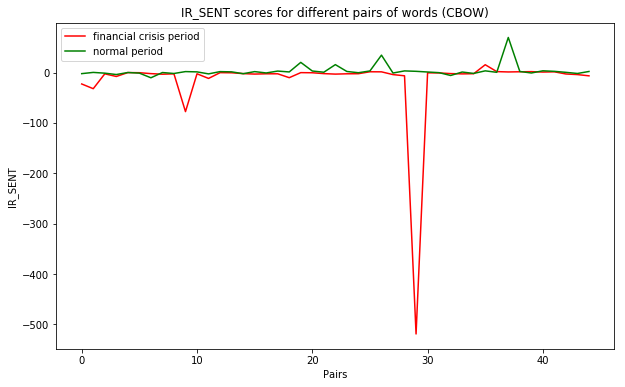

In [400]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(sa_pair_df['IR_fs'], label='financial crisis period', color='red')
plt.plot(sa_pair_df['IR_nm'], label='normal period', color='green')
plt.title('IR_SENT scores for different pairs of words (CBOW)')
plt.ylabel('IR_SENT')
plt.xlabel('Pairs')
plt.legend()
plt.show()

The above figure visualise the IR_SENT scores of different pairs of words. The green line represents the IR_SENT of words during the normal period and the red line represents the IR_SENT during the fiancial crisis. Best viewed in colors. As we can see from the figure, most of the time, the scores in normal period are greater than the scores in financial crisis period. The words in X list tend to be less similar to the decrease words during the normal period than the financial crisis, which satisfied our previous expectation. There are some bigrams having large spread in scores during two periods. Therefore, to further analyse what could be the reasonable explaination of the causation of this spread, we ranked the bigrams by the difference between scores (IR_SENT_fs - IR_SENT_nm) below.

In [410]:
diff_pair = sa_pair_df['IR_nm'] - sa_pair_df['IR_fs']
diff_df = pd.DataFrame({'Difference':diff_pair, 'Pairs':sa_pair_df['Pairs']})
diff_df.sort_values(by=['Difference'], ascending=False).head(5)

,Difference,Pairs
29,521.214048,"[monetary, consume]"
9,79.418046,"[activity, growth]"
37,68.436594,"[price, wealth]"
26,33.134866,"[monetary, value]"
1,32.305618,"[gdp, growth]"


The word 'monetary' and 'growth' appear more than once in the top five spread. Therefore, including these two words in the X list might lead to a larger spread of IR_SENT scores between two periods. Note that everytime we retrain the model, since the word embedding matrix is the weight matrix inside the neural network, the results could be different. Therefore, the rank of pairs by the difference between the IR_SENT scores of two periods might change. Looking for the pattern of this is left as our future work. We also want to consider the scores of a list with more words (not only bigrams), which will be shown below.

#### Expanding the X list from two words to N words

In this section, in terms of seeing the performances of pairs of words, we are looking at the performances for diffferent length of the list of words (i.e. start from two words in the x list and start including more words). Note that we just simply start from one bigram and expand, which can also be extended to starting from different bigrams. By doing this, we can have a sensitivity analysis for all possible combinations of words in the X list, which is left as our future work as well.

In [408]:
ir_fs=[]
ir_nm=[]
list_name=[]
slice_num=1
for i in range(len(X_)):
    slice_num+=1
    Xs = [CBOW_fs.wv[mypreprocess_ID(word)] for word in X_[:slice_num]]
    Ys = [CBOW_nm.wv[mypreprocess_ID(word)] for word in X_[:slice_num]]
    ir_fs.append(IR_sent(Xs, I_fs, D_fs))
    ir_nm.append(IR_sent(Ys, I_nm, D_nm))
    list_name.append(X_[:slice_num])
sa_df = pd.DataFrame({'List':list_name, 'IR_fs':ir_fs, 'IR_nm':ir_nm})
sa_df

,IR_fs,IR_nm,List
0,-22.731057,-2.208680,"[gdp, activity]"
1,-41.250187,0.221246,"[gdp, activity, growth]"
2,-8.084381,0.533976,"[gdp, activity, growth, monetary]"
3,-10.208626,0.128685,"[gdp, activity, growth, monetary, economic]"
4,-4.940922,1.452864,"[gdp, activity, growth, monetary, economic, pr..."
5,-3.781704,1.920563,"[gdp, activity, growth, monetary, economic, pr..."
6,-4.035590,0.955454,"[gdp, activity, growth, monetary, economic, pr..."
7,-4.570425,2.248064,"[gdp, activity, growth, monetary, economic, pr..."
8,-4.957270,2.392022,"[gdp, activity, growth, monetary, economic, pr..."
9,-4.957270,2.392022,"[gdp, activity, growth, monetary, economic, pr..."


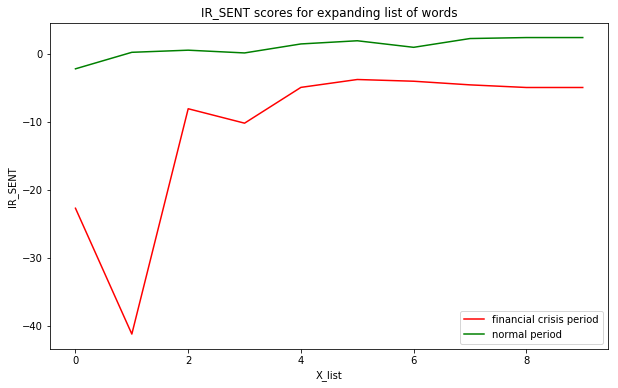

In [409]:
plt.figure(figsize=(10,6))
plt.plot(sa_df['IR_fs'], label='financial crisis period', color='red')
plt.plot(sa_df['IR_nm'], label='normal period', color='green')
plt.title('IR_SENT scores for expanding list of words')
plt.ylabel('IR_SENT')
plt.xlabel('X_list')
plt.legend()
plt.show()

The above figure visualise the scores of the expanding list during two periods. Best viewed in colors. The scores under the financial crisis period always smaller than the scores during the normal period, which again satisfied our expectation.

### Skip-Gram Model

In order to see whether this relation will change if we change the model, we redo the sensitivity analysis by using the Skip-Gram model.

#### Try all combinations of bigrams

In [353]:
ir_fs_SG=[]
ir_nm_SG=[]
pair_name=[]
for i in range(len(X_)):
    for j in range(i+1,len(X_)):
        Xs_SG = [SkipGram_fs.wv[mypreprocess_ID(word)] for word in [X_[i],X_[j]]]
        Ys_SG = [SkipGram_nm.wv[mypreprocess_ID(word)] for word in [X_[i],X_[j]]]
        ir_fs_SG.append(IR_sent(Xs_SG, I_fs_SG, D_fs_SG))
        ir_nm_SG.append(IR_sent(Ys_SG, I_nm_SG, D_nm_SG))
        pair_name.append([X_[i],X_[j]])
sa_pair_SG = pd.DataFrame({'Pairs':pair_name, 'IR_fs':ir_fs_SG, 'IR_nm':ir_nm_SG})
sa_pair_SG

,IR_fs,IR_nm,Pairs
0,-16.009012,-5.510156,"[gdp, activity]"
1,-19.464198,-3.512488,"[gdp, growth]"
2,-0.782625,-1.339533,"[gdp, monetary]"
3,-17.694723,-5.343833,"[gdp, economic]"
4,-1.271480,-1.093475,"[gdp, price]"
5,-2.571714,-3.126583,"[gdp, value]"
6,-2.395122,-13.262568,"[gdp, yield]"
7,-20.035425,-0.528535,"[gdp, wealth]"
8,-14.691113,-7.078293,"[gdp, consume]"
9,-8.896927,-7.686142,"[activity, growth]"


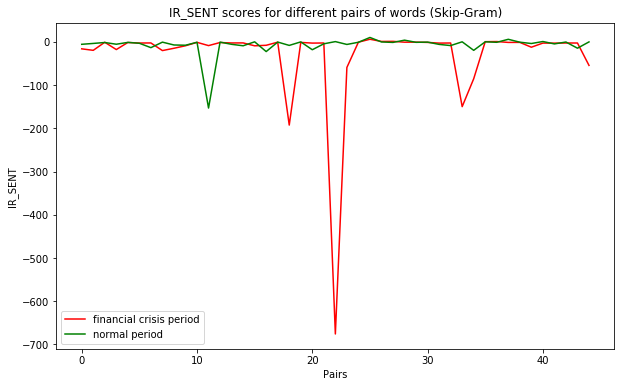

In [354]:
plt.figure(figsize=(10,6))
plt.plot(sa_pair_SG['IR_fs'], label='financial crisis period', color='red')
plt.plot(sa_pair_SG['IR_nm'], label='normal period', color='green')
plt.title('IR_SENT scores for different pairs of words (Skip-Gram)')
plt.ylabel('IR_SENT')
plt.xlabel('Pairs')
plt.legend()
plt.show()

From the above figure, although the scores during the financial crisis are still tend to be lower, the relations are not as obvious as using the CBOW model. There could be a few reasons for this. Firstly, our normal period actually includes not only the period of increase but some decline periods as well (e.g. dot com bubble). Secondly, we haven't tuned the hyper-parameters of this model, which could also affect the results as well. Looking more deeply into the performance differences between two models is left as our future work.

#### Sort the pairs by the difference (IR_SENT_normal period - IR_SENT_financial crisis )

In [405]:
diff_pair_SG = sa_pair_SG['IR_nm'] - sa_pair_SG['IR_fs']
diff_df_SG = pd.DataFrame({'Difference':diff_pair_SG, 'Pairs':sa_pair_SG['Pairs']})
diff_df_SG.sort_values(by=['Difference'], ascending=False).head(5)

,Difference,Pairs
22,676.409755,"[growth, wealth]"
18,184.315916,"[growth, economic]"
33,149.994603,"[economic, wealth]"
34,65.713971,"[economic, consume]"
44,54.366937,"[wealth, consume]"


We again ranked the bigrams by the difference between IR_nm and IR_fs. In the above table, the combinations of words 'growth', 'wealth', 'economic' and 'consume' have large spread, which means these words could have different representations during two periods.

#### Expanding the X list from two words to N words

In [406]:
ir_fs_SG=[]
ir_nm_SG=[]
list_name=[]
slice_num=1
for i in range(len(X_)):
    slice_num+=1
    Xs_SG = [SkipGram_fs.wv[mypreprocess_ID(word)] for word in X_[:slice_num]]
    Ys_SG = [SkipGram_nm.wv[mypreprocess_ID(word)] for word in X_[:slice_num]]
    ir_fs_SG.append(IR_sent(Xs_SG, I_fs_SG, D_fs_SG))
    ir_nm_SG.append(IR_sent(Ys_SG, I_nm_SG, D_nm_SG))
    list_name.append(X_[:slice_num])
sa_df_SG = pd.DataFrame({'List':list_name, 'IR_fs':ir_fs_SG, 'IR_nm':ir_nm_SG})
sa_df_SG

,IR_fs,IR_nm,List
0,-16.009012,-5.510156,"[gdp, activity]"
1,-15.970168,-5.676103,"[gdp, activity, growth]"
2,-4.041600,-3.597321,"[gdp, activity, growth, monetary]"
3,-5.848253,-5.194464,"[gdp, activity, growth, monetary, economic]"
4,-5.068604,-3.913055,"[gdp, activity, growth, monetary, economic, pr..."
5,-5.522626,-4.763463,"[gdp, activity, growth, monetary, economic, pr..."
6,-5.911837,-6.529097,"[gdp, activity, growth, monetary, economic, pr..."
7,-7.574798,-4.335118,"[gdp, activity, growth, monetary, economic, pr..."
8,-9.287757,-5.666679,"[gdp, activity, growth, monetary, economic, pr..."
9,-9.287757,-5.666679,"[gdp, activity, growth, monetary, economic, pr..."


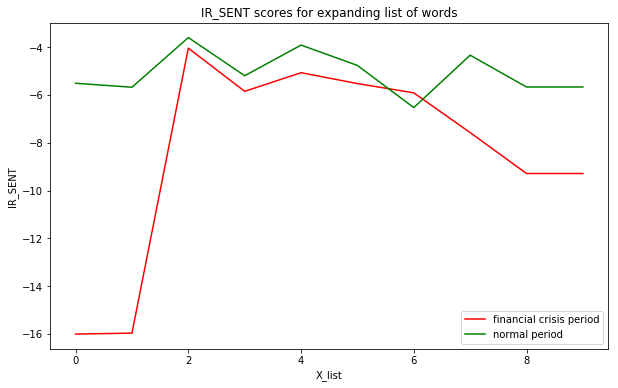

In [407]:
plt.figure(figsize=(10,6))
plt.plot(sa_df_SG['IR_fs'], label='financial crisis period', color='red')
plt.plot(sa_df_SG['IR_nm'], label='normal period', color='green')
plt.title('IR_SENT scores for expanding list of words')
plt.ylabel('IR_SENT')
plt.xlabel('X_list')
plt.legend()
plt.show()

Similar to the CBOW model, for the words in the expanding X lists, most of the scores during the financial crisis period are smaller than the scores during the normal period, which again satisfied our expectation.

### Check whether the IR_SENT score relations between two datasets changed for different hyper-parameters

Previously we set 200 neurons for the hidden layer of the neural network model. In order to see whether the change of this hyper-parameter will affect the relations of scores between two periods, we changed the neuron amount (which will change the dimension of the weight matrix) and did the sensitivity analysis again.

In [358]:
CBOW_fs_500 = gensim.models.Word2Vec(Token_fs,sg=0,
                              min_count=3,  # Ignore words that appear less than this
                              size=500,  # Dimensionality of word embeddings
                              workers=3,  # Number of processors (parallelisation)
                              window=5,  # Context window for words during train,  5words after the given word
                              iter=30)

In [359]:
CBOW_nm_500 = gensim.models.Word2Vec(Token_nm,sg=0,
                              min_count=3,  # Ignore words that appear less than this
                              size=500,  # Dimensionality of word embeddings
                              workers=3,  # Number of processors (parallelisation)
                              window=5,  # Context window for words during train,  5words after the given word
                              iter=30)

In [364]:
I_fs = []
I_nm = []
Iw=[]
for words in I_words:
    try:
        I_fs.append(CBOW_fs_500.wv[words])
        I_nm.append(CBOW_nm_500.wv[words])
        Iw.append(words)
    except:
        pass
D_fs = []
D_nm = []
Dw=[]
for words in D_words:
    try:
        D_fs.append(CBOW_fs_500.wv[words])
        D_nm.append(CBOW_nm_500.wv[words])
        Dw.append(words)
    except:
        pass

In [365]:
ir_fs=[]
ir_nm=[]
pair_name=[]
for i in range(len(X_)):
    for j in range(i+1,len(X_)):
        Xs = [CBOW_fs_500.wv[mypreprocess_ID(word)] for word in [X_[i],X_[j]]]
        Ys = [CBOW_nm_500.wv[mypreprocess_ID(word)] for word in [X_[i],X_[j]]]
        ir_fs.append(IR_sent(Xs, I_fs, D_fs))
        ir_nm.append(IR_sent(Ys, I_nm, D_nm))
        pair_name.append([X_[i],X_[j]])
sa_pair_df = pd.DataFrame({'Pairs':pair_name, 'IR_fs':ir_fs, 'IR_nm':ir_nm})
sa_pair_df

,IR_fs,IR_nm,Pairs
0,-72.210111,-1.818523,"[gdp, activity]"
1,-130.718578,0.141213,"[gdp, growth]"
2,-0.745720,-1.089679,"[gdp, monetary]"
3,-10.068643,-2.338183,"[gdp, economic]"
4,-0.375356,0.093564,"[gdp, price]"
5,-0.608544,-0.872595,"[gdp, value]"
6,-2.817245,-17.195970,"[gdp, yield]"
7,-4.517171,0.158040,"[gdp, wealth]"
8,-4.592333,-1.180317,"[gdp, consume]"
9,-46.534589,2.172129,"[activity, growth]"


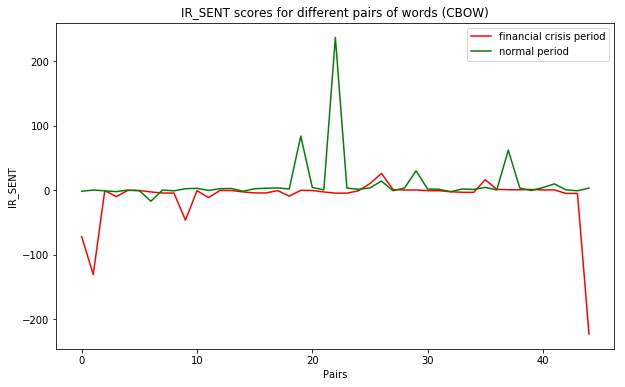

In [366]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(sa_pair_df['IR_fs'], label='financial crisis period', color='red')
plt.plot(sa_pair_df['IR_nm'], label='normal period', color='green')
plt.title('IR_SENT scores for different pairs of words (CBOW)')
plt.ylabel('IR_SENT')
plt.xlabel('Pairs')
plt.legend()
plt.show()

In [367]:
ir_fs=[]
ir_nm=[]
list_name=[]
slice_num=1
for i in range(len(X_)):
    slice_num+=1
    Xs = [CBOW_fs_500.wv[mypreprocess_ID(word)] for word in X_[:slice_num]]
    Ys = [CBOW_nm_500.wv[mypreprocess_ID(word)] for word in X_[:slice_num]]
    ir_fs.append(IR_sent(Xs, I_fs, D_fs))
    ir_nm.append(IR_sent(Ys, I_nm, D_nm))
    list_name.append(X_[:slice_num])
sa_df = pd.DataFrame({'List':list_name, 'IR_fs':ir_fs, 'IR_nm':ir_nm})
sa_df

,IR_fs,IR_nm,List
0,-72.210111,-1.818523,"[gdp, activity]"
1,-83.797388,0.227021,"[gdp, activity, growth]"
2,-4.044334,0.643945,"[gdp, activity, growth, monetary]"
3,-6.132630,0.602226,"[gdp, activity, growth, monetary, economic]"
4,-4.108378,2.058836,"[gdp, activity, growth, monetary, economic, pr..."
5,-3.338016,2.792923,"[gdp, activity, growth, monetary, economic, pr..."
6,-3.762890,1.529372,"[gdp, activity, growth, monetary, economic, pr..."
7,-4.501888,3.008304,"[gdp, activity, growth, monetary, economic, pr..."
8,-5.293455,3.528429,"[gdp, activity, growth, monetary, economic, pr..."
9,-5.293455,3.528429,"[gdp, activity, growth, monetary, economic, pr..."


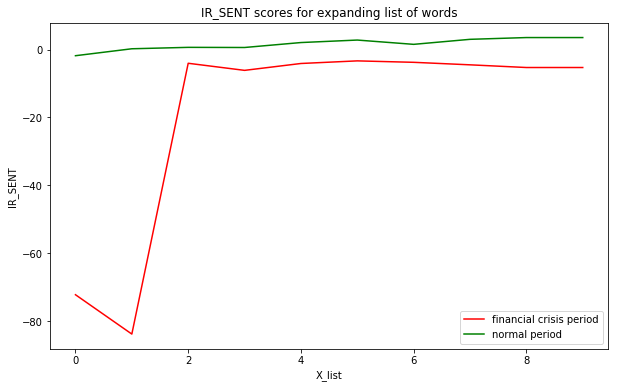

In [368]:
plt.figure(figsize=(10,6))
plt.plot(sa_df['IR_fs'], label='financial crisis period', color='red')
plt.plot(sa_df['IR_nm'], label='normal period', color='green')
plt.title('IR_SENT scores for expanding list of words')
plt.ylabel('IR_SENT')
plt.xlabel('X_list')
plt.legend()
plt.show()

From the above analysis, we found that the change of the dimension of the weight matrix will not affect to much to the sentiment index relation during two periods (i.e. normal period will have higher IR_SENT scores than financial crisis period). 

## High GDP Growth and Low GDP Growth

We are also interested in the sentiment index difference in two periods that having high and low GDP growth rates in UK repectively. The GDP growth rate in UK was around -2\% during the Global Financial Crisis and was around 1.8\% from 1999 to 2000, which can be regarded as the period with low GDP growth and period with high GDP growth respectively. In this case, since we are using two periods having particular patterns (high growth and low growth), we should expect a positive sentiment index for high growth period and a negative index for low growth period.

In [232]:
index1_dc = np.where(data_article.index == '200802')[0][0]
index2_dc = np.where(data_article.index == '200905')[0][0]
index3_dc = np.where(data_article.index == '199905')[0][0]
index4_dc = np.where(data_article.index == '200002')[0][0]
data_fs_period_dc = data_article.iloc[index1_dc:index2_dc+1]
data_nm_period_dc = data_article.iloc[index3_dc:index4_dc+1]

In [233]:
#generate the training at the sentence level and prepare the corpus
Token_fs_dc=[]
new_text2_dc=[]
for paragraph in data_fs_period_dc['Report'].tolist():
    print('Num of Loop at '+str(data_fs_period_dc['Report'].tolist().index(paragraph)))
    sentences=sent_tokenize(paragraph)
    for sent in sentences:
        #save the preprocessed document at the sentence level in lists
        Token_fs_dc.append(mypreprocess(sent))
        #save the preprocessed document at the sentence level in strings
        new_text2_dc.append(' '.join(mypreprocess(sent)))

Num of Loop at 0
Num of Loop at 1
Num of Loop at 2
Num of Loop at 3
Num of Loop at 4
Num of Loop at 5


In [222]:
#generate the training at the sentence level and prepare the corpus
Token_nm_dc=[]
new_text2_dc=[]
for paragraph in data_nm_period_dc['Report'].tolist():
    print('Num of Loop at '+str(data_nm_period_dc['Report'].tolist().index(paragraph)))
    sentences=sent_tokenize(paragraph)
    for sent in sentences:
        #save the preprocessed document at the sentence level in lists
        Token_nm_dc.append(mypreprocess(sent))
        #save the preprocessed document at the sentence level in strings
        new_text2_dc.append(' '.join(mypreprocess(sent)))

Num of Loop at 0
Num of Loop at 1
Num of Loop at 2
Num of Loop at 3


### Train Model

In [234]:
CBOW_fs_dc = gensim.models.Word2Vec(Token_fs_dc,sg=0,
                              min_count=3,  # Ignore words that appear less than this
                              size=200,  # Dimensionality of word embeddings
                              workers=3,  # Number of processors (parallelisation)
                              window=5,  # Context window for words during train,  5words after the given word
                              iter=30)

In [235]:
CBOW_nm_dc = gensim.models.Word2Vec(Token_nm_dc,sg=0,
                              min_count=3,  # Ignore words that appear less than this
                              size=200,  # Dimensionality of word embeddings
                              workers=3,  # Number of processors (parallelisation)
                              window=5,  # Context window for words during train,  5words after the given word
                              iter=30)

In [413]:
SkipGram_fs_dc = gensim.models.Word2Vec(Token_fs_dc,sg=1,
                              min_count=3,  # Ignore words that appear less than this
                              size=200,  # Dimensionality of word embeddings
                              workers=3,  # Number of processors (parallelisation)
                              window=5,  # Context window for words during train,  5words after the given word
                              iter=30)

In [414]:
SkipGram_nm_dc = gensim.models.Word2Vec(Token_nm_dc,sg=1,
                              min_count=3,  # Ignore words that appear less than this
                              size=200,  # Dimensionality of word embeddings
                              workers=3,  # Number of processors (parallelisation)
                              window=5,  # Context window for words during train,  5words after the given word
                              iter=30)

### Learned representation of increase/decrease words on CBOW_low_growth/CBOW_high_growth

In [236]:
I_fs_dc = []
I_nm_dc = []
for words in I_words:
    try:
        I_fs_dc.append(CBOW_fs_dc.wv[words])
        I_nm_dc.append(CBOW_nm_dc.wv[words])
    except:
        pass
D_fs_dc = []
D_nm_dc = []
for words in D_words:
    try:
        D_fs_dc.append(CBOW_fs_dc.wv[words])
        D_nm_dc.append(CBOW_nm_dc.wv[words])
    except:
        pass

### Learned representation of increase/decrease words on SkipGram_low_growth/SkipGram_high_growth

In [415]:
I_fs_dc_SG = []
I_nm_dc_SG = []
for words in I_words:
    try:
        I_fs_dc_SG.append(SkipGram_fs_dc.wv[words])
        I_nm_dc_SG.append(SkipGram_nm_dc.wv[words])
    except:
        pass
D_fs_dc_SG = []
D_nm_dc_SG = []
for words in D_words:
    try:
        D_fs_dc_SG.append(SkipGram_fs_dc.wv[words])
        D_nm_dc_SG.append(SkipGram_nm_dc.wv[words])
    except:
        pass

#### Define a list of word x that reflects a particular economic concept, which should vary across two datasets

In [263]:
X_ = ['gdp', 'activity', 'growth', 'monetary', 'economic', 'price', 'value', 'yield', 'wealth', 'consume']

Representations of words (CBOW)

In [416]:
X_dc = [CBOW_fs_dc.wv[mypreprocess_ID(word)] for word in X_]
Y_dc = [CBOW_nm_dc.wv[mypreprocess_ID(word)] for word in X_]

Representations of words (Skip-Gram)

In [417]:
X_dc_SG = [SkipGram_fs_dc.wv[mypreprocess_ID(word)] for word in X_]
Y_dc_SG = [SkipGram_nm_dc.wv[mypreprocess_ID(word)] for word in X_]

#### IR_SENT score (CBOW)

In [418]:
print('Low GDP Growth:',IR_sent(X_dc, I_fs_dc, D_fs_dc))
print('High GDP Growth:',IR_sent(Y_dc, I_nm_dc, D_nm_dc))

Low GDP Growth: -4.869585787227742
Low GDP Growth: 6.676005109581706


#### IR_SENT score (Skip-Gram)

In [419]:
print('Low GDP Growth:',IR_sent(X_dc_SG, I_fs_dc_SG, D_fs_dc_SG))
print('High GDP Growth:',IR_sent(Y_dc_SG, I_nm_dc_SG, D_nm_dc_SG))

Low GDP Growth: -6.770920057388495
Low GDP Growth: 4.343925231412035


For both CBOW and Skip-Gram models, the high GDP growth period has positive sentiment indices and the low GDP growth period has negative sentiment indices, which makes sense as the X list's words should have higher cosine similarity to increase words than decrease words when the economy grows fast and vice versa.

==================================================================================================================

## Sensitivity Analysis for words chosen

### CBOW Model

#### Try all combinations of bigrams

In [292]:
ir_fs_dc=[]
ir_nm_dc=[]
pair_name=[]
for i in range(len(X_)):
    for j in range(i+1,len(X_)):
        Xs_dc = [CBOW_fs_dc.wv[mypreprocess_ID(word)] for word in [X_[i],X_[j]]]
        Ys_dc = [CBOW_nm_dc.wv[mypreprocess_ID(word)] for word in [X_[i],X_[j]]]
        ir_fs_dc.append(IR_sent(Xs_dc, I_fs_dc, D_fs_dc))
        ir_nm_dc.append(IR_sent(Ys_dc, I_nm_dc, D_nm_dc))
        pair_name.append([X_[i],X_[j]])
sa_pair_df_dc = pd.DataFrame({'Pairs':pair_name, 'IR_low_growth':ir_fs_dc, 'IR_high_growth':ir_nm_dc})
sa_pair_df_dc

,IR_high_growth,IR_low_growth,Pairs
0,-0.532241,-18.777612,"[gdp, activity]"
1,-4.909682,-39.314861,"[gdp, growth]"
2,0.081232,-0.704890,"[gdp, monetary]"
3,-1.147993,-0.465622,"[gdp, interest]"
4,-1.324342,-1.717451,"[gdp, price]"
5,-0.373854,-0.048463,"[gdp, value]"
6,-0.389837,-1.366947,"[gdp, yield]"
7,0.046506,-4.559371,"[gdp, wealth]"
8,-0.132790,-26.156446,"[gdp, economic]"
9,0.316822,-12.776857,"[activity, growth]"


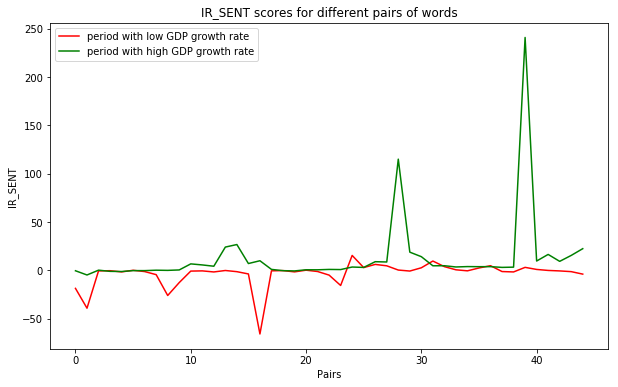

In [295]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(sa_pair_df_dc['IR_low_growth'], label='period with low GDP growth rate', color='red')
plt.plot(sa_pair_df_dc['IR_high_growth'], label='period with high GDP growth rate', color='green')
plt.title('IR_SENT scores for different pairs of words')
plt.ylabel('IR_SENT')
plt.xlabel('Pairs')
plt.legend()
plt.show()

#### Sort the pairs by the difference (IR_SENT_high GDP growth - IR_SENT_low GDP growth )

In [411]:
diff_pair_dc = sa_pair_df_dc['IR_high_growth'] - sa_pair_df_dc['IR_low_growth']
diff_df_dc = pd.DataFrame({'Difference':diff_pair_dc, 'Pairs':sa_pair_df_dc['Pairs']})
diff_df_dc.sort_values(by=['Difference'], ascending=False).head(5)

,Difference,Pairs
39,238.163040,"[value, yield]"
28,114.873574,"[monetary, wealth]"
16,75.857500,"[activity, economic]"
1,34.405179,"[gdp, growth]"
14,28.104875,"[activity, yield]"


#### Expanding the X list from two words to N words

In [310]:
ir_fs_dc=[]
ir_nm_dc=[]
list_name=[]
slice_num=1
for i in range(len(X_)):
    slice_num+=1
    Xs_dc = [CBOW_fs_dc.wv[mypreprocess_ID(word)] for word in X_[:slice_num]]
    Ys_dc = [CBOW_nm_dc.wv[mypreprocess_ID(word)] for word in X_[:slice_num]]
    ir_fs_dc.append(IR_sent(Xs_dc, I_fs_dc, D_fs_dc))
    ir_nm_dc.append(IR_sent(Ys_dc, I_nm_dc, D_nm_dc))
    list_name.append(X_[:slice_num])
sa_dc_df = pd.DataFrame({'List':list_name, 'IR_low_growth':ir_fs_dc, 'IR_high_growth':ir_nm_dc})
sa_dc_df

,IR_high_growth,IR_low_growth,List
0,-0.532241,-18.777612,"[gdp, activity]"
1,-1.289613,-22.301719,"[gdp, activity, growth]"
2,0.297389,-3.962811,"[gdp, activity, growth, monetary]"
3,0.697935,-2.577645,"[gdp, activity, growth, monetary, interest]"
4,1.065305,-2.637533,"[gdp, activity, growth, monetary, interest, pr..."
5,2.144353,-1.230466,"[gdp, activity, growth, monetary, interest, pr..."
6,3.287942,-1.060197,"[gdp, activity, growth, monetary, interest, pr..."
7,4.844669,-1.644702,"[gdp, activity, growth, monetary, interest, pr..."
8,6.328966,-3.108653,"[gdp, activity, growth, monetary, interest, pr..."
9,6.328966,-3.108653,"[gdp, activity, growth, monetary, interest, pr..."


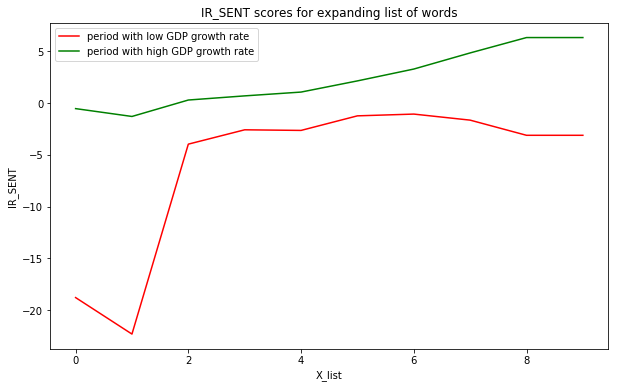

In [311]:
plt.figure(figsize=(10,6))
plt.plot(sa_dc_df['IR_low_growth'], label='period with low GDP growth rate', color='red')
plt.plot(sa_dc_df['IR_high_growth'], label='period with high GDP growth rate', color='green')
plt.title('IR_SENT scores for expanding list of words')
plt.ylabel('IR_SENT')
plt.xlabel('X_list')
plt.legend()
plt.show()

### Skip-Gram Model

#### Try all combinations of bigrams

In [420]:
ir_fs_dc_SG=[]
ir_nm_dc_SG=[]
pair_name=[]
for i in range(len(X_)):
    for j in range(i+1,len(X_)):
        Xs_dc_SG = [SkipGram_fs_dc.wv[mypreprocess_ID(word)] for word in [X_[i],X_[j]]]
        Ys_dc_SG = [SkipGram_nm_dc.wv[mypreprocess_ID(word)] for word in [X_[i],X_[j]]]
        ir_fs_dc_SG.append(IR_sent(Xs_dc_SG, I_fs_dc_SG, D_fs_dc_SG))
        ir_nm_dc_SG.append(IR_sent(Ys_dc_SG, I_nm_dc_SG, D_nm_dc_SG))
        pair_name.append([X_[i],X_[j]])
sa_pair_df_dc_SG = pd.DataFrame({'Pairs':pair_name, 'IR_low_growth':ir_fs_dc_SG, 'IR_high_growth':ir_nm_dc_SG})
sa_pair_df_dc_SG

,IR_high_growth,IR_low_growth,Pairs
0,-0.469268,-4.234214,"[gdp, activity]"
1,-23.790854,-6.422751,"[gdp, growth]"
2,-1.361312,0.240295,"[gdp, monetary]"
3,-0.396361,-20.272734,"[gdp, economic]"
4,-2.005839,-1.072652,"[gdp, price]"
5,0.080514,-3.050512,"[gdp, value]"
6,-1.917603,-0.624030,"[gdp, yield]"
7,0.121803,-5.689625,"[gdp, wealth]"
8,0.471572,-35.570100,"[gdp, consume]"
9,-0.307195,-10.598541,"[activity, growth]"


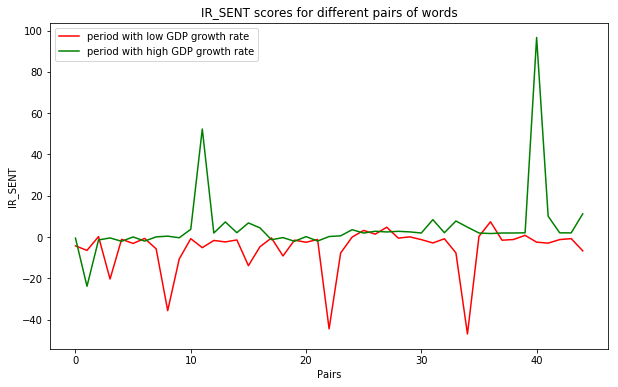

In [421]:
plt.figure(figsize=(10,6))
plt.plot(sa_pair_df_dc_SG['IR_low_growth'], label='period with low GDP growth rate', color='red')
plt.plot(sa_pair_df_dc_SG['IR_high_growth'], label='period with high GDP growth rate', color='green')
plt.title('IR_SENT scores for different pairs of words')
plt.ylabel('IR_SENT')
plt.xlabel('Pairs')
plt.legend()
plt.show()

#### Expanding the X list from two words to N words

In [422]:
ir_fs_dc_SG=[]
ir_nm_dc_SG=[]
list_name=[]
slice_num=1
for i in range(len(X_)):
    slice_num+=1
    Xs_dc_SG = [SkipGram_fs_dc.wv[mypreprocess_ID(word)] for word in X_[:slice_num]]
    Ys_dc_SG = [SkipGram_nm_dc.wv[mypreprocess_ID(word)] for word in X_[:slice_num]]
    ir_fs_dc_SG.append(IR_sent(Xs_dc_SG, I_fs_dc_SG, D_fs_dc_SG))
    ir_nm_dc_SG.append(IR_sent(Ys_dc_SG, I_nm_dc_SG, D_nm_dc_SG))
    list_name.append(X_[:slice_num])
sa_dc_df_SG = pd.DataFrame({'List':list_name, 'IR_low_growth':ir_fs_dc_SG, 'IR_high_growth':ir_nm_dc_SG})
sa_dc_df_SG

,IR_high_growth,IR_low_growth,List
0,-0.469268,-4.234214,"[gdp, activity]"
1,-1.678462,-7.791257,"[gdp, activity, growth]"
2,-1.515138,-2.924163,"[gdp, activity, growth, monetary]"
3,-0.511665,-4.168211,"[gdp, activity, growth, monetary, economic]"
4,-0.562263,-3.968247,"[gdp, activity, growth, monetary, economic, pr..."
5,0.987924,-4.373683,"[gdp, activity, growth, monetary, economic, pr..."
6,1.086278,-3.974320,"[gdp, activity, growth, monetary, economic, pr..."
7,2.599021,-5.567972,"[gdp, activity, growth, monetary, economic, pr..."
8,4.343925,-6.770920,"[gdp, activity, growth, monetary, economic, pr..."
9,4.343925,-6.770920,"[gdp, activity, growth, monetary, economic, pr..."


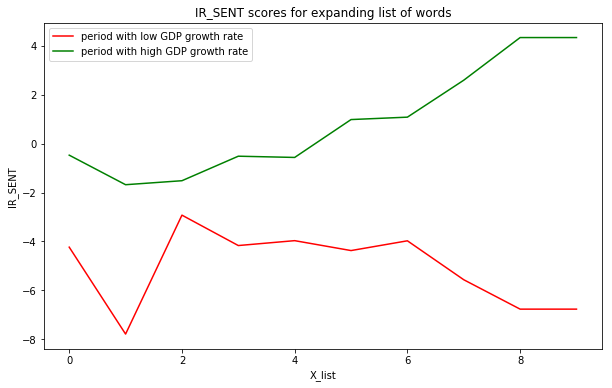

In [423]:
plt.figure(figsize=(10,6))
plt.plot(sa_dc_df_SG['IR_low_growth'], label='period with low GDP growth rate', color='red')
plt.plot(sa_dc_df_SG['IR_high_growth'], label='period with high GDP growth rate', color='green')
plt.title('IR_SENT scores for expanding list of words')
plt.ylabel('IR_SENT')
plt.xlabel('X_list')
plt.legend()
plt.show()

In this sensitivity analysis (high growth vs low growth), we can draw similar conclusions for two models (i.e. CBOW and Skip-Gram), which are bigrams tend to be more similar to the increase words during the high growth period (vice versa) and the IR_SENT scores are greater during the high growth period than during the low growth period. This satisfied our expectations.